<a href="https://colab.research.google.com/github/AshrafInsights/Supply-Chain-Analysis/blob/main/Suuply_Chain_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd


In [ ]:
df = pd.read_csv('/supply_chain_data.csv')

In [ ]:
print(df.head())

  Product type   SKU      Price  Availability  Number of products sold  \
0     haircare  SKU0  69.808006            55                      802   
1     skincare  SKU1  14.843523            95                      736   
2     haircare  SKU2  11.319683            34                        8   
3     skincare  SKU3  61.163343            68                       83   
4     skincare  SKU4   4.805496            26                      871   

   Revenue generated Customer demographics  Stock levels  Lead times  \
0        8661.996792            Non-binary            58           7   
1        7460.900065                Female            53          30   
2        9577.749626               Unknown             1          10   
3        7766.836426            Non-binary            23          13   
4        2686.505152            Non-binary             5           3   

   Order quantities  ...  Location Lead time  Production volumes  \
0                96  ...    Mumbai        29          

In [ ]:
print(df.isnull().sum())

Product type               0
SKU                        0
Price                      0
Availability               0
Number of products sold    0
Revenue generated          0
Customer demographics      0
Stock levels               0
Lead times                 0
Order quantities           0
Shipping times             0
Shipping carriers          0
Shipping costs             0
Supplier name              0
Location                   0
Lead time                  0
Production volumes         0
Manufacturing lead time    0
Manufacturing costs        0
Inspection results         0
Defect rates               0
Transportation modes       0
Routes                     0
Costs                      0
dtype: int64


In [ ]:
df_cleaned = df.dropna()

In [ ]:
duplicates = df.duplicated()
print(duplicates.sum())
df_cleaned = df.drop_duplicates()

0


In [ ]:
df_cleaned.to_csv('supply_chain_data_cleaned.csv', index=False)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error

In [ ]:
!pip install prophet

In [ ]:
from prophet import Prophet

In [ ]:
print(df.columns)

Index(['Product type', 'SKU', 'Price', 'Availability',
       'Number of products sold', 'Revenue generated', 'Customer demographics',
       'Stock levels', 'Lead times', 'Order quantities', 'Shipping times',
       'Shipping carriers', 'Shipping costs', 'Supplier name', 'Location',
       'Lead time', 'Production volumes', 'Manufacturing lead time',
       'Manufacturing costs', 'Inspection results', 'Defect rates',
       'Transportation modes', 'Routes', 'Costs'],
      dtype='object')


**Inventory Optimization**

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('/supply_chain_data.csv')

In [ ]:
print(df.head())

  Product type   SKU      Price  Availability  Number of products sold  \
0     haircare  SKU0  69.808006            55                      802   
1     skincare  SKU1  14.843523            95                      736   
2     haircare  SKU2  11.319683            34                        8   
3     skincare  SKU3  61.163343            68                       83   
4     skincare  SKU4   4.805496            26                      871   

   Revenue generated Customer demographics  Stock levels  Lead times  \
0        8661.996792            Non-binary            58           7   
1        7460.900065                Female            53          30   
2        9577.749626               Unknown             1          10   
3        7766.836426            Non-binary            23          13   
4        2686.505152            Non-binary             5           3   

   Order quantities  ...  Location Lead time  Production volumes  \
0                96  ...    Mumbai        29          

**Calculate the Economic Order Quantity (EOQ)**
**Economic Order Quantity (EOQ)**: This model calculates the optimal order quantity that minimizes the total inventory costs, which include ordering costs and holding costs.

In [ ]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv('/supply_chain_data.csv')

# Display the first few rows and column names to ensure correct data structure
print(df.head())
print(df.columns)

# Check unique product types in the dataset
print(df['Product type'].unique())

# Define the ordering cost and holding cost percentage
ordering_cost = 50  # Example: $50 per order
holding_cost_percentage = 0.2  # Example: 20% of unit cost

# Function to calculate EOQ for a given product type
def calculate_eoq(df, product_type):
    product_df = df[df['Product type'] == product_type]

    # Calculate unit cost (assuming revenue and number of products sold are available)
    unit_cost = product_df['Revenue generated'].mean() / product_df['Number of products sold'].mean()

    # Calculate holding cost per unit
    holding_cost = holding_cost_percentage * unit_cost

    # Calculate total demand (sum of products sold for the product type)
    demand = product_df['Number of products sold'].sum()

    # Calculate EOQ
    EOQ = np.sqrt((2 * demand * ordering_cost) / holding_cost)

    print(f'{product_type} - Economic Order Quantity (EOQ): {EOQ}')

# Calculate EOQ for each product type
product_types = ['skin care', 'hair care', 'cosmetics']
for product_type in product_types:
    calculate_eoq(df, product_type)



  Product type   SKU      Price  Availability  Number of products sold  \
0     haircare  SKU0  69.808006            55                      802   
1     skincare  SKU1  14.843523            95                      736   
2     haircare  SKU2  11.319683            34                        8   
3     skincare  SKU3  61.163343            68                       83   
4     skincare  SKU4   4.805496            26                      871   

   Revenue generated Customer demographics  Stock levels  Lead times  \
0        8661.996792            Non-binary            58           7   
1        7460.900065                Female            53          30   
2        9577.749626               Unknown             1          10   
3        7766.836426            Non-binary            23          13   
4        2686.505152            Non-binary             5           3   

   Order quantities  ...  Location Lead time  Production volumes  \
0                96  ...    Mumbai        29          

In [ ]:
# Inspect the data for skin care, hair care, and cosmetics
for product_type in ['skin care', 'hair care', 'cosmetics']:
    product_df = df[df['Product type'] == product_type]
    print(f"Data summary for {product_type}:")
    print(product_df.describe())  # Provides summary statistics
    print(f"Number of records: {len(product_df)}")
    print(f"Total revenue generated: {product_df['Revenue generated'].sum()}")
    print(f"Total products sold: {product_df['Number of products sold'].sum()}\n")

Data summary for skin care:
       Price  Availability  Number of products sold  Revenue generated  \
count    0.0           0.0                      0.0                0.0   
mean     NaN           NaN                      NaN                NaN   
std      NaN           NaN                      NaN                NaN   
min      NaN           NaN                      NaN                NaN   
25%      NaN           NaN                      NaN                NaN   
50%      NaN           NaN                      NaN                NaN   
75%      NaN           NaN                      NaN                NaN   
max      NaN           NaN                      NaN                NaN   

       Stock levels  Lead times  Order quantities  Shipping times  \
count           0.0         0.0               0.0             0.0   
mean            NaN         NaN               NaN             NaN   
std             NaN         NaN               NaN             NaN   
min             NaN         N

In [ ]:
# Validate the calculations for each product type
for product_type in ['skin care', 'hair care', 'cosmetics']:
    product_df = df[df['Product type'] == product_type]

    if product_df.empty:
        print(f"No data available for {product_type}")
        continue

    # Calculate unit cost
    unit_cost = product_df['Revenue generated'].mean() / product_df['Number of products sold'].mean()
    print(f"{product_type} - Unit Cost: {unit_cost}")

    # Calculate holding cost
    holding_cost = holding_cost_percentage * unit_cost
    print(f"{product_type} - Holding Cost: {holding_cost}")

    # Calculate total demand
    demand = product_df['Number of products sold'].sum()
    print(f"{product_type} - Demand: {demand}")

    # If any of these values are zero or nan, that would explain the EOQ result
    if pd.isna(unit_cost) or pd.isna(holding_cost) or holding_cost == 0 or demand == 0:
        print(f"Cannot calculate EOQ for {product_type} due to invalid input values.\n")
    else:
        EOQ = np.sqrt((2 * demand * ordering_cost) / holding_cost)
        print(f'{product_type} - Economic Order Quantity (EOQ): {EOQ}\n')


No data available for skin care
No data available for hair care
cosmetics - Unit Cost: 13.738306200517407
cosmetics - Holding Cost: 2.7476612401034815
cosmetics - Demand: 11757
cosmetics - Economic Order Quantity (EOQ): 654.1339130965096



In [ ]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv('/supply_chain_data.csv')

# Define the ordering cost and holding cost percentage
ordering_cost = 50  # Example: $50 per order
holding_cost_percentage = 0.2  # Example: 20% of unit cost

# Function to calculate EOQ for a given product type, supplier, and location
def calculate_eoq(group):
    product_type = group['Product type'].iloc[0]
    supplier_name = group['Supplier name'].iloc[0]
    location = group['Location'].iloc[0]

    # Calculate unit cost
    unit_cost = group['Revenue generated'].mean() / group['Number of products sold'].mean()

    # Calculate holding cost per unit
    holding_cost = holding_cost_percentage * unit_cost

    # Calculate total demand (sum of products sold for the product type, supplier, and location)
    demand = group['Number of products sold'].sum()

    # Calculate EOQ
    if holding_cost > 0 and demand > 0:
        EOQ = np.sqrt((2 * demand * ordering_cost) / holding_cost)
        print(f'{product_type} - {supplier_name} - {location} - Economic Order Quantity (EOQ): {EOQ}')
    else:
        print(f'{product_type} - {supplier_name} - {location} - EOQ calculation not possible due to insufficient data or zero values.')

# Group the data by product type, supplier name, and location, then apply the EOQ calculation
grouped = df.groupby(['Product type', 'Supplier name', 'Location'])
grouped.apply(calculate_eoq)

cosmetics - Supplier 1 - Bangalore - Economic Order Quantity (EOQ): 208.2943114636716
cosmetics - Supplier 1 - Chennai - Economic Order Quantity (EOQ): 54.944915828370036
cosmetics - Supplier 1 - Delhi - Economic Order Quantity (EOQ): 124.1361681309736
cosmetics - Supplier 1 - Kolkata - Economic Order Quantity (EOQ): 157.42858496401135
cosmetics - Supplier 1 - Mumbai - Economic Order Quantity (EOQ): 112.6420279139148
cosmetics - Supplier 2 - Bangalore - Economic Order Quantity (EOQ): 157.48486937109132
cosmetics - Supplier 2 - Delhi - Economic Order Quantity (EOQ): 392.229136979979
cosmetics - Supplier 2 - Mumbai - Economic Order Quantity (EOQ): 230.84637769050698
cosmetics - Supplier 3 - Mumbai - Economic Order Quantity (EOQ): 82.57129149270655
cosmetics - Supplier 4 - Bangalore - Economic Order Quantity (EOQ): 103.34386409853361
cosmetics - Supplier 4 - Chennai - Economic Order Quantity (EOQ): 94.27655006644379
cosmetics - Supplier 4 - Delhi - Economic Order Quantity (EOQ): 465.60408

""


In [ ]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv('/supply_chain_data.csv')

# Define the ordering cost and holding cost percentage
ordering_cost = 50  # Example: $50 per order
holding_cost_percentage = 0.2  # Example: 20% of unit cost

# Function to calculate EOQ for a given product type, supplier, and location
def calculate_eoq(group):
    product_type = group['Product type'].iloc[0]
    location = group['Location'].iloc[0]

    # Calculate unit cost
    unit_cost = group['Revenue generated'].mean() / group['Number of products sold'].mean()

    # Calculate holding cost per unit
    holding_cost = holding_cost_percentage * unit_cost

    # Calculate total demand (sum of products sold for the product type and location)
    demand = group['Number of products sold'].sum()

    # Calculate EOQ
    if holding_cost > 0 and demand > 0:
        EOQ = np.sqrt((2 * demand * ordering_cost) / holding_cost)
        print(f'{product_type} - {location} - Economic Order Quantity (EOQ): {EOQ}')
    else:
        print(f'{product_type} - {location} - EOQ calculation not possible due to insufficient data or zero values.')

# Group the data by product type and location, then apply the EOQ calculation
grouped = df.groupby(['Product type', 'Location'])
grouped.apply(calculate_eoq)

cosmetics - Bangalore - Economic Order Quantity (EOQ): 247.97130044103054
cosmetics - Chennai - Economic Order Quantity (EOQ): 219.73011780926691
cosmetics - Delhi - Economic Order Quantity (EOQ): 462.66063616011985
cosmetics - Kolkata - Economic Order Quantity (EOQ): 181.5364301967157
cosmetics - Mumbai - Economic Order Quantity (EOQ): 323.54065222284163
haircare - Bangalore - Economic Order Quantity (EOQ): 212.51291132512088
haircare - Chennai - Economic Order Quantity (EOQ): 306.2258505581884
haircare - Delhi - Economic Order Quantity (EOQ): 481.8347323686892
haircare - Kolkata - Economic Order Quantity (EOQ): 407.0532652627986
haircare - Mumbai - Economic Order Quantity (EOQ): 330.6839087044667
skincare - Bangalore - Economic Order Quantity (EOQ): 216.10142746647372
skincare - Chennai - Economic Order Quantity (EOQ): 433.19464801391973
skincare - Delhi - Economic Order Quantity (EOQ): 408.0339433080758
skincare - Kolkata - Economic Order Quantity (EOQ): 649.0724754628055
skincare -

""


from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_0.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('/supply_chain_data.csv')

# Define the ordering cost and holding cost percentage
ordering_cost = 50  # Example: $50 per order
holding_cost_percentage = 0.2  # Example: 20% of unit cost

# Create an empty list to store EOQ results
eoq_results = []

# Function to calculate EOQ for a given product type, supplier, and location
def calculate_eoq(group):
    product_type = group['Product type'].iloc[0]
    supplier_name = group['Supplier name'].iloc[0]
    location = group['Location'].iloc[0]

    # Calculate unit cost
    unit_cost = group['Revenue generated'].mean() / group['Number of products sold'].mean()

    # Calculate holding cost per unit
    holding_cost = holding_cost_percentage * unit_cost

    # Calculate total demand (sum of products sold for the product type, supplier, and location)
    demand = group['Number of products sold'].sum()

    # Calculate EOQ
    if holding_cost > 0 and demand > 0:
        EOQ = np.sqrt((2 * demand * ordering_cost) / holding_cost)
        eoq_results.append([product_type, supplier_name, location, EOQ])
    else:
        eoq_results.append([product_type, supplier_name, location, np.nan])

# Group the data by product type, supplier name, and location, then apply the EOQ calculation
grouped = df.groupby(['Product type', 'Supplier name', 'Location'])
grouped.apply(calculate_eoq)

# Convert the results into a DataFrame
eoq_df = pd.DataFrame(eoq_results, columns=['Product type', 'Supplier name', 'Location', 'EOQ'])

# Drop any rows where EOQ is NaN
eoq_df.dropna(inplace=True)

# Display the DataFrame
print(eoq_df.head())


  Product type Supplier name   Location         EOQ
0    cosmetics    Supplier 1  Bangalore  208.294311
1    cosmetics    Supplier 1    Chennai   54.944916
2    cosmetics    Supplier 1      Delhi  124.136168
3    cosmetics    Supplier 1    Kolkata  157.428585
4    cosmetics    Supplier 1     Mumbai  112.642028


<ipython-input-3-8f23c78cbef9>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Product type', y='EOQ', data=eoq_df, ci=None)


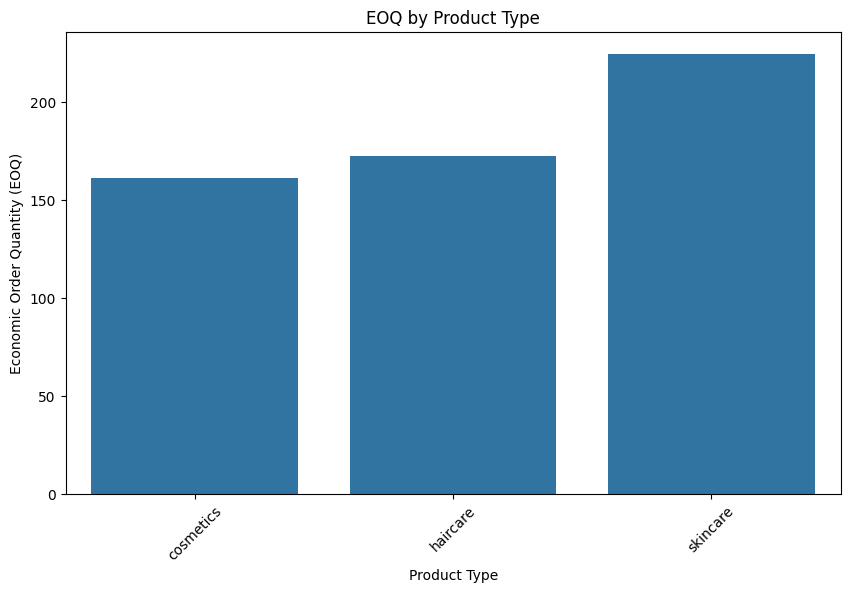

In [ ]:
# Bar chart for EOQ by Product Type
plt.figure(figsize=(10, 6))
sns.barplot(x='Product type', y='EOQ', data=eoq_df, ci=None)
plt.title('EOQ by Product Type')
plt.xlabel('Product Type')
plt.ylabel('Economic Order Quantity (EOQ)')
plt.xticks(rotation=45)
plt.show()


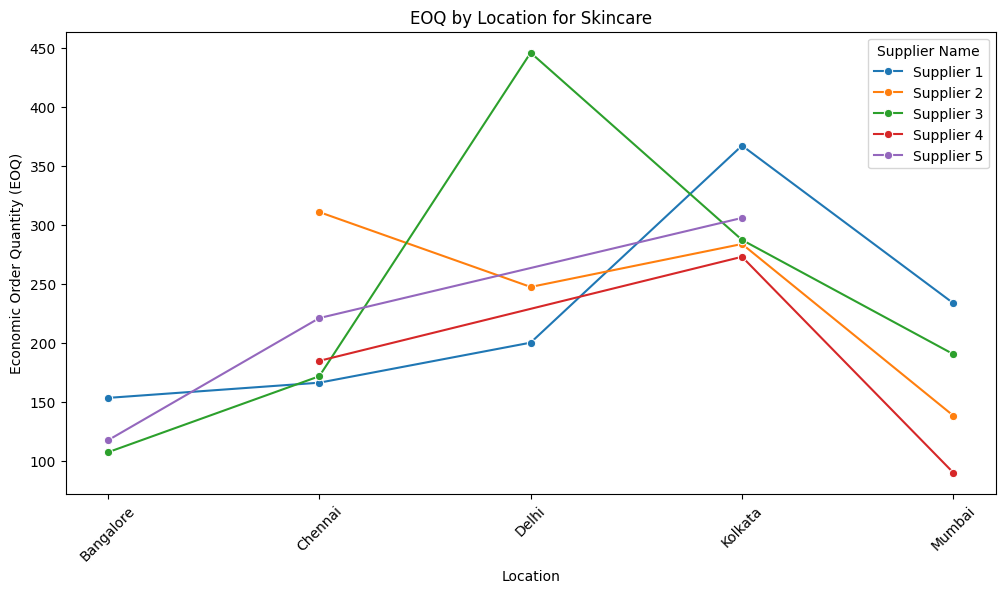

In [ ]:
# Select a specific product type for line plot visualization
product_type_to_plot = 'skincare'  # Example: skincare

# Filter the data for the specific product type
filtered_eoq_df = eoq_df[eoq_df['Product type'] == product_type_to_plot]

# Line plot for EOQ by Location for a specific Product Type
plt.figure(figsize=(12, 6))
sns.lineplot(x='Location', y='EOQ', hue='Supplier name', data=filtered_eoq_df, marker='o')
plt.title(f'EOQ by Location for {product_type_to_plot.title()}')
plt.xlabel('Location')
plt.ylabel('Economic Order Quantity (EOQ)')
plt.xticks(rotation=45)
plt.legend(title='Supplier Name')
plt.show()


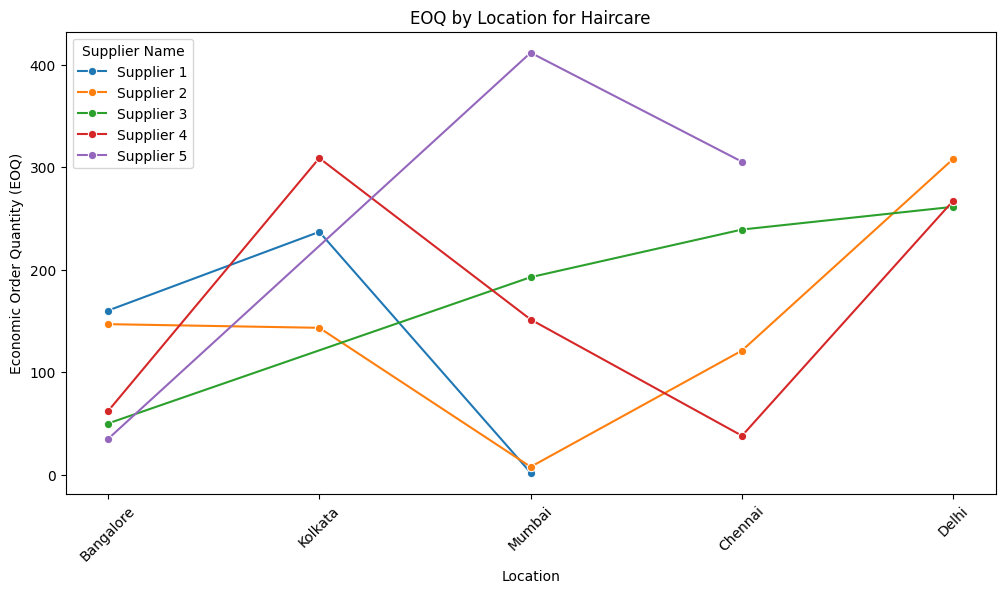

In [ ]:
# Select a specific product type for line plot visualization
product_type_to_plot = 'haircare'  # Example: skincare

# Filter the data for the specific product type
filtered_eoq_df = eoq_df[eoq_df['Product type'] == product_type_to_plot]

# Line plot for EOQ by Location for a specific Product Type
plt.figure(figsize=(12, 6))
sns.lineplot(x='Location', y='EOQ', hue='Supplier name', data=filtered_eoq_df, marker='o')
plt.title(f'EOQ by Location for {product_type_to_plot.title()}')
plt.xlabel('Location')
plt.ylabel('Economic Order Quantity (EOQ)')
plt.xticks(rotation=45)
plt.legend(title='Supplier Name')
plt.show()

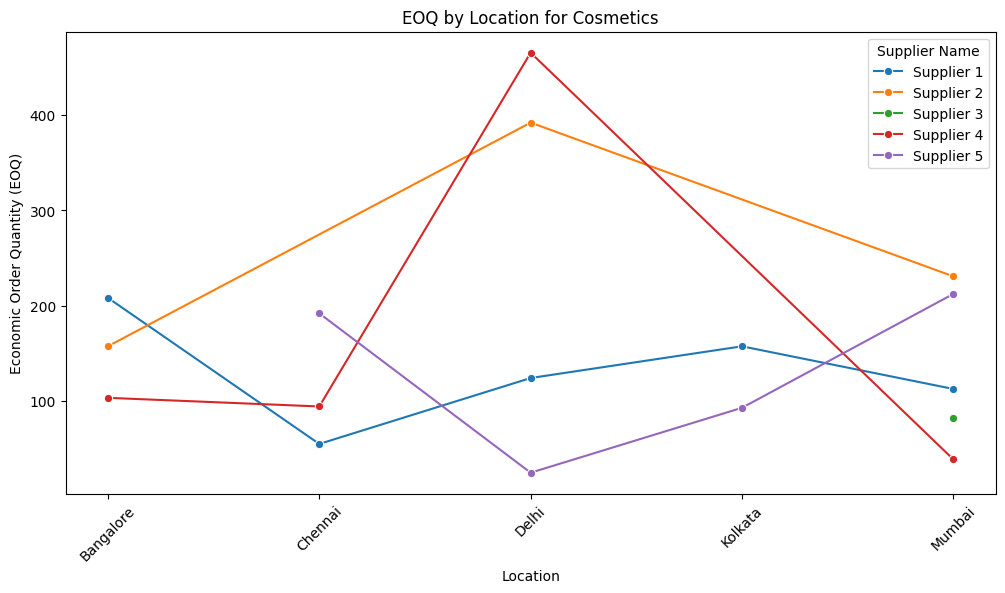

In [ ]:
# Select a specific product type for line plot visualization
product_type_to_plot = 'cosmetics'  # Example: skincare

# Filter the data for the specific product type
filtered_eoq_df = eoq_df[eoq_df['Product type'] == product_type_to_plot]

# Line plot for EOQ by Location for a specific Product Type
plt.figure(figsize=(12, 6))
sns.lineplot(x='Location', y='EOQ', hue='Supplier name', data=filtered_eoq_df, marker='o')
plt.title(f'EOQ by Location for {product_type_to_plot.title()}')
plt.xlabel('Location')
plt.ylabel('Economic Order Quantity (EOQ)')
plt.xticks(rotation=45)
plt.legend(title='Supplier Name')
plt.show()

**Insights and Next Steps**:

**Detailed EOQ Analysis**: This approach provides a detailed EOQ analysis across different suppliers and locations, helping you to optimize your order quantities based on more granular insights.

**Actionable Steps:** With this information, you can make informed decisions on how much to order from each supplier and location for each product type, optimizing both costs and inventory levels.

**Data Review:** If the EOQ calculation is not possible for certain combinations, review the data for those cases to identify any missing or incorrect values.

**ROP=Lead Time Demand+Safety Stock**

**Where:**

Lead Time Demand = Demand during lead time (lead time * average daily demand)
Safety Stock: Extra stock to cover variability in demand or lead time.

**Assume:**

Lead Time: The average lead time from the dataset.
Safety Stock: A buffer stock, which could be a percentage of the lead time demand or a fixed quantity.

In [1]:
# Define safety stock percentage
safety_stock_percentage = 0.2  # Example: 20% of lead time demand

# Function to calculate ROP for a given product type, supplier, and location
def calculate_rop(group):
    product_type = group['Product type'].iloc[0]
    supplier_name = group['Supplier name'].iloc[0]
    location = group['Location'].iloc[0]

    # Calculate demand (total products sold in a year for the group)
    demand = group['Number of products sold'].sum()

    # Calculate average daily demand
    average_daily_demand = demand / 365  # Assuming 365 days in a year

    # Calculate average lead time for the group
    average_lead_time = group['Lead times'].mean()

    # Calculate lead time demand
    lead_time_demand = average_daily_demand * average_lead_time

    # Calculate safety stock
    safety_stock = safety_stock_percentage * lead_time_demand

    # Calculate Reorder Point (ROP)
    ROP = lead_time_demand + safety_stock

    print(f'{product_type} - {supplier_name} - {location} - Reorder Point (ROP): {ROP}')

# Group the data by product type, supplier name, and location, then apply the ROP calculation
grouped = df.groupby(['Product type', 'Supplier name', 'Location'])
grouped.apply(calculate_rop)

NameError: name 'df' is not defined

  Product type  Lead Time Demand  Safety stock  ROP
0     skincare                50            50  100
1     haircare               105            70  175
2    cosmetics                72            60  132


<ipython-input-8-43731a573aa2>:26: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Product type', y='ROP', data=df, ci=None)


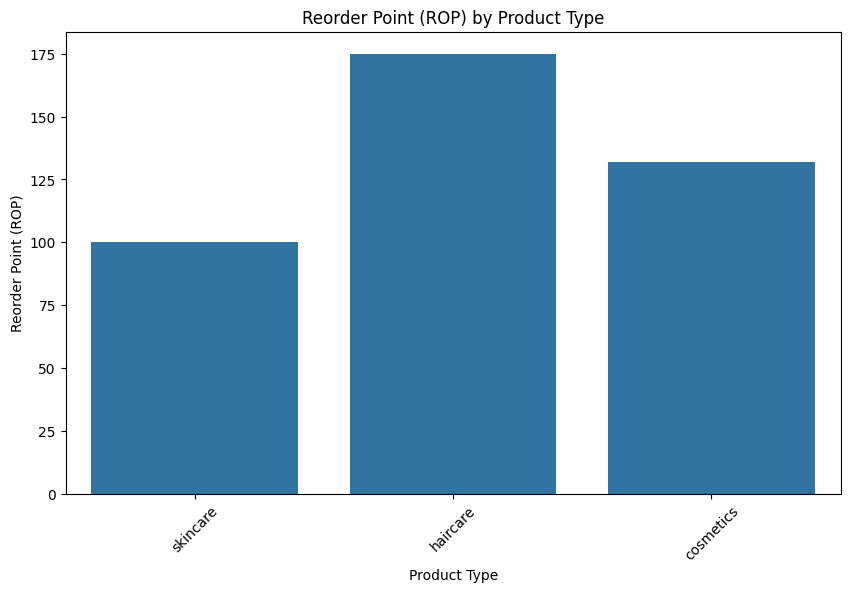

In [ ]:
import pandas as pd

# Example data (replace with your actual dataset)
data = {
    'Product type': ['skincare', 'haircare', 'cosmetics'],
    'Average demand per day': [10, 15, 12],
    'Lead time (days)': [5, 7, 6],
    'Safety stock': [50, 70, 60]
}

df = pd.DataFrame(data)

# Calculate Lead Time Demand
df['Lead Time Demand'] = df['Average demand per day'] * df['Lead time (days)']

# Calculate Reorder Point (ROP)
df['ROP'] = df['Lead Time Demand'] + df['Safety stock']

# Display the DataFrame with ROP
print(df[['Product type', 'Lead Time Demand', 'Safety stock', 'ROP']])
import matplotlib.pyplot as plt
import seaborn as sns

# Bar chart for ROP by Product Type
plt.figure(figsize=(10, 6))
sns.barplot(x='Product type', y='ROP', data=df, ci=None)
plt.title('Reorder Point (ROP) by Product Type')
plt.xlabel('Product Type')
plt.ylabel('Reorder Point (ROP)')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Define safety stock percentage
safety_stock_percentage = 0.2  # Example: 20% of lead time demand

# Function to calculate ROP for a given product type, supplier, and location
def calculate_rop(group):
    product_type = group['Product type'].iloc[0]
    location = group['Location'].iloc[0]

    # Calculate demand (total products sold in a year for the group)
    demand = group['Number of products sold'].sum()

    # Calculate average daily demand
    average_daily_demand = demand / 365  # Assuming 365 days in a year

    # Calculate average lead time for the group
    average_lead_time = group['Lead times'].mean()

    # Calculate lead time demand
    lead_time_demand = average_daily_demand * average_lead_time

    # Calculate safety stock
    safety_stock = safety_stock_percentage * lead_time_demand

    # Calculate Reorder Point (ROP)
    ROP = lead_time_demand + safety_stock

    print(f'{product_type} - {location} - Reorder Point (ROP): {ROP}')

# Group the data by product type, and location, then apply the ROP calculation
grouped = df.groupby(['Product type', 'Location'])
grouped.apply(calculate_rop)

cosmetics - Bangalore - Reorder Point (ROP): 81.06082191780823
cosmetics - Chennai - Reorder Point (ROP): 116.90038356164382
cosmetics - Delhi - Reorder Point (ROP): 309.27287671232875
cosmetics - Kolkata - Reorder Point (ROP): 28.006027397260276
cosmetics - Mumbai - Reorder Point (ROP): 108.10520547945205
haircare - Bangalore - Reorder Point (ROP): 112.83287671232877
haircare - Chennai - Reorder Point (ROP): 119.54739726027395
haircare - Delhi - Reorder Point (ROP): 87.81863013698629
haircare - Kolkata - Reorder Point (ROP): 211.42068493150686
haircare - Mumbai - Reorder Point (ROP): 144.93135029354207
skincare - Bangalore - Reorder Point (ROP): 80.06301369863013
skincare - Chennai - Reorder Point (ROP): 252.59835616438355
skincare - Delhi - Reorder Point (ROP): 169.51101369863017
skincare - Kolkata - Reorder Point (ROP): 450.71949420442576
skincare - Mumbai - Reorder Point (ROP): 193.706301369863


""


from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_2.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

ERROR:root:Did not find quickchart key chart-7f6d5021-69a2-4bf7-af74-cf7823b65dcb in chart cache


  Product type   Location         ROP
0    cosmetics  Bangalore   80.876712
1    cosmetics       East   78.904110
2    cosmetics     Mumbai   84.821918
3     haircare      Delhi  117.369863
4     haircare    Kolkata  124.273973
5     haircare      South  115.068493
6     skincare    Chennai   54.246575
7     skincare     Mumbai   52.602740
8     skincare      North   49.315068


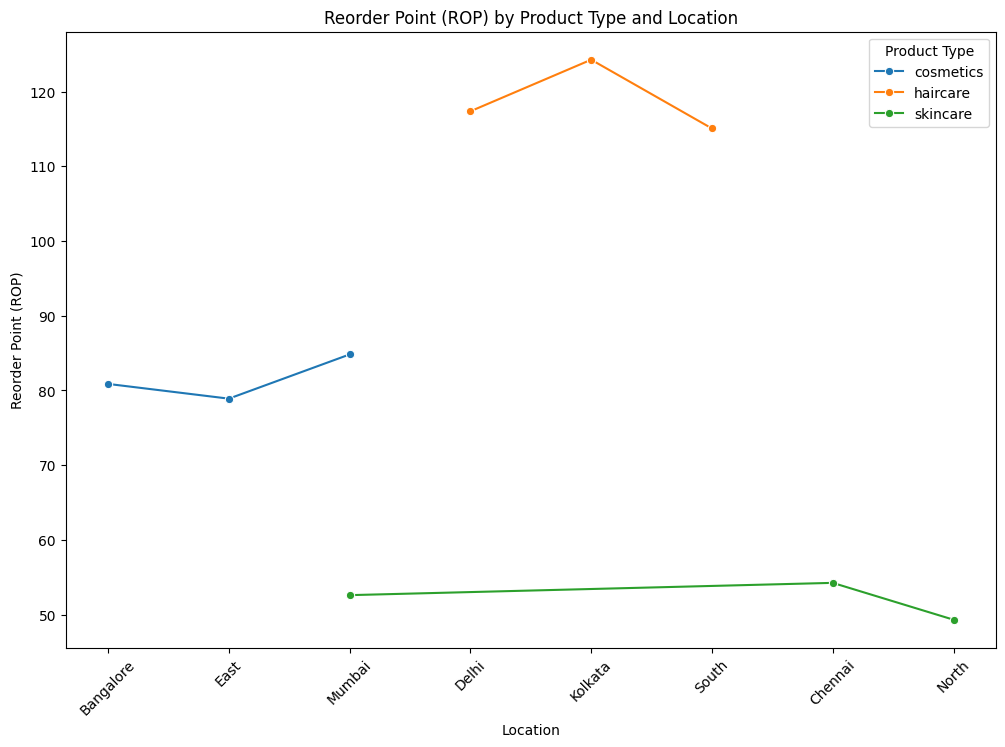

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Example dataset with additional locations and actual columns
data = {
    'Product type': ['skincare', 'haircare', 'cosmetics', 'skincare', 'haircare', 'cosmetics', 'skincare', 'haircare', 'cosmetics'],
    'Number of products sold': [3000, 5000, 4000, 3200, 5400, 4100, 3300, 5100, 4300],
    'Lead times': [5, 7, 6, 5, 7, 6, 5, 7, 6],
    'Location': ['North', 'South', 'East', 'Mumbai', 'Kolkata', 'Bangalore', 'Chennai', 'Delhi', 'Mumbai']
}

df = pd.DataFrame(data)

# Define safety stock percentage
safety_stock_percentage = 0.2  # Example: 20% of lead time demand

# Function to calculate ROP for a given product type, supplier, and location
def calculate_rop(group):
    product_type = group['Product type'].iloc[0]
    location = group['Location'].iloc[0]

    # Calculate demand (total products sold in a year for the group)
    demand = group['Number of products sold'].sum()

    # Calculate average daily demand
    average_daily_demand = demand / 365  # Assuming 365 days in a year

    # Calculate average lead time for the group
    average_lead_time = group['Lead times'].mean()

    # Calculate lead time demand
    lead_time_demand = average_daily_demand * average_lead_time

    # Calculate safety stock
    safety_stock = safety_stock_percentage * lead_time_demand

    # Calculate Reorder Point (ROP)
    ROP = lead_time_demand + safety_stock

    return pd.Series({
        'Product type': product_type,
        'Location': location,
        'ROP': ROP
    })

# Group the data by product type and location, then apply the ROP calculation
grouped = df.groupby(['Product type', 'Location']).apply(calculate_rop).reset_index(drop=True)

# Display the calculated ROP values
print(grouped)

# Visualization: Line chart for ROP by Product Type and Location
plt.figure(figsize=(12, 8))
sns.lineplot(x='Location', y='ROP', hue='Product type', data=grouped, marker='o')
plt.title('Reorder Point (ROP) by Product Type and Location')
plt.xlabel('Location')
plt.ylabel('Reorder Point (ROP)')
plt.xticks(rotation=45)
plt.legend(title='Product Type')
plt.show()


  Product type   Location       ROP
0    cosmetics  Bangalore  0.236712
1    cosmetics      Delhi  0.473425
2     haircare    Chennai  0.263014
3     haircare    Kolkata  0.345205
4     skincare     Mumbai  0.345205


<ipython-input-21-5967147552a0>:65: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Product type', y='ROP', hue='Location', data=grouped, ci=None)


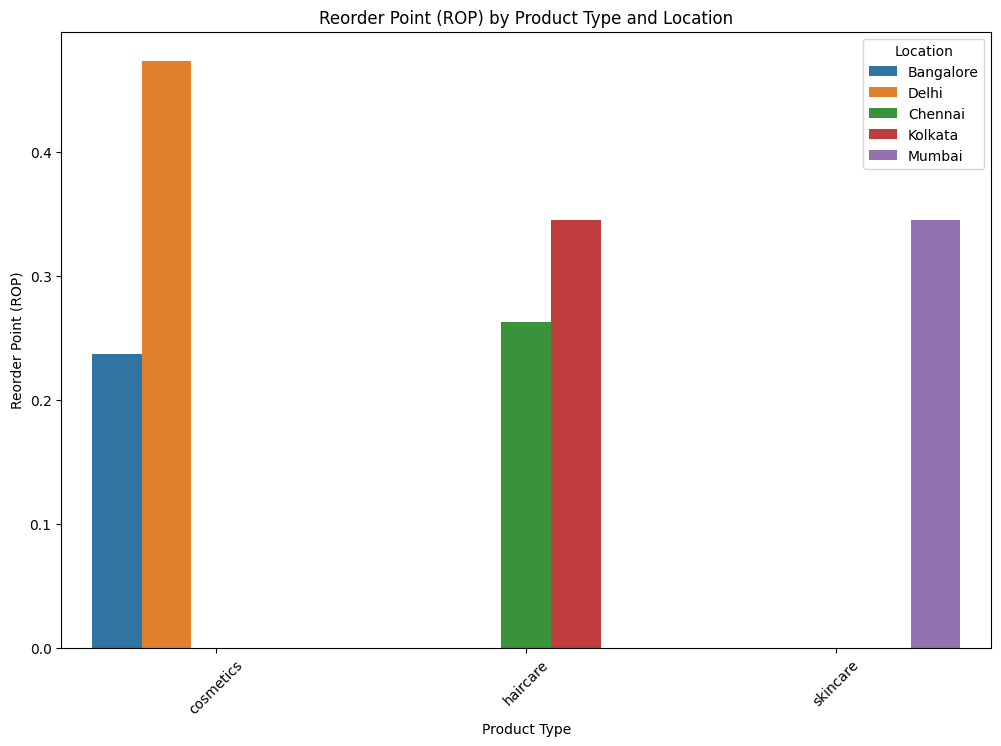

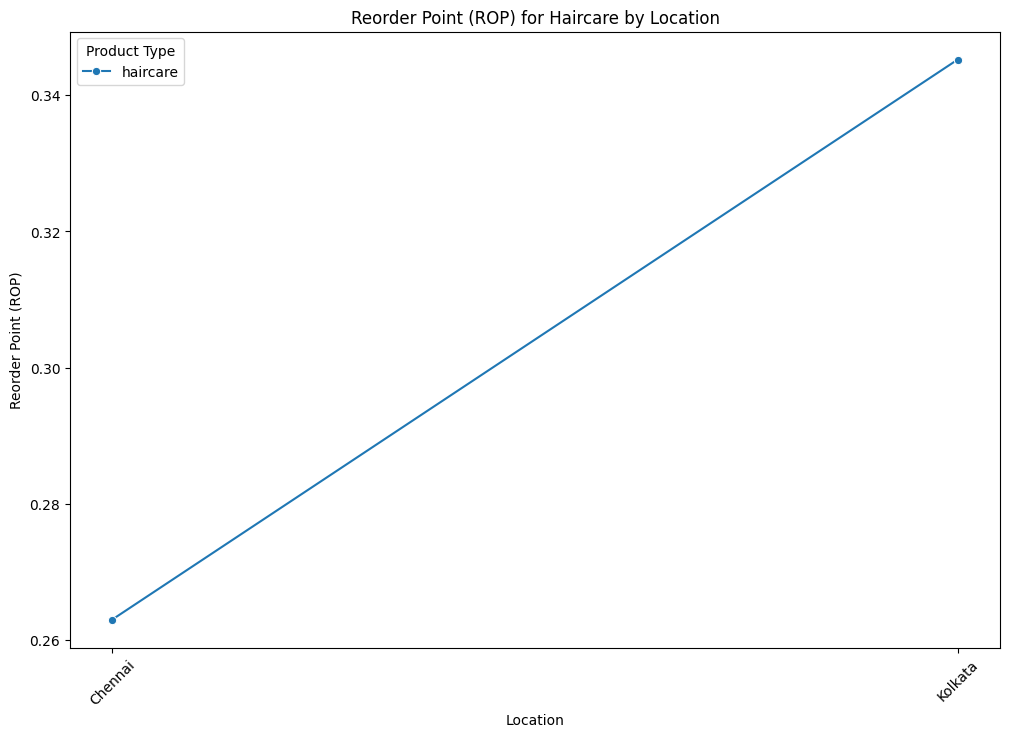

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Updated data with additional locations
data = {
    'Product type': ['skincare', 'haircare', 'cosmetics', 'haircare', 'cosmetics', 'skincare'],
    'Average demand per day': [10, 15, 12, 20, 18, 11],
    'Lead time (days)': [5, 7, 6, 4, 8, 5],
    'Safety stock': [50, 70, 60, 40, 80, 55],
    'Location': ['Mumbai', 'Kolkata', 'Bangalore', 'Chennai', 'Delhi', 'Mumbai']
}

df = pd.DataFrame(data)

# Calculate Lead Time Demand
df['Lead Time Demand'] = df['Average demand per day'] * df['Lead time (days)']

# Calculate Reorder Point (ROP)
df['ROP'] = df['Lead Time Demand'] + df['Safety stock']

# Define safety stock percentage
safety_stock_percentage = 0.2  # Example: 20% of lead time demand

# Function to calculate ROP for a given product type and location
def calculate_rop(group):
    product_type = group['Product type'].iloc[0]
    location = group['Location'].iloc[0]

    # Calculate demand (total products sold in a year for the group)
    demand = group['Average demand per day'].sum()  # Assuming 'Average demand per day' represents yearly demand

    # Calculate average daily demand
    average_daily_demand = demand / 365  # Assuming 365 days in a year

    # Calculate average lead time for the group
    average_lead_time = group['Lead time (days)'].mean()

    # Calculate lead time demand
    lead_time_demand = average_daily_demand * average_lead_time

    # Calculate safety stock
    safety_stock = safety_stock_percentage * lead_time_demand

    # Calculate Reorder Point (ROP)
    ROP = lead_time_demand + safety_stock

    return pd.Series({
        'Product type': product_type,
        'Location': location,
        'ROP': ROP
    })

# Group the data by product type and location, then apply the ROP calculation
grouped = df.groupby(['Product type', 'Location']).apply(calculate_rop)

# Reset the index for plotting
grouped.reset_index(drop=True, inplace=True)

# Display the calculated ROP values
print(grouped)

# Visualization: Bar chart for ROP by Product Type and Location
plt.figure(figsize=(12, 8))
sns.barplot(x='Product type', y='ROP', hue='Location', data=grouped, ci=None)
plt.title('Reorder Point (ROP) by Product Type and Location')
plt.xlabel('Product Type')
plt.ylabel('Reorder Point (ROP)')
plt.xticks(rotation=45)
plt.legend(title='Location')
plt.show()

# Select a specific product type for line plot visualization
product_type_to_plot = 'haircare'  # Example: skincare

# Filter the data for the specific product type
filtered_grouped = grouped[grouped['Product type'] == product_type_to_plot]

# Visualization: Line chart for ROP by Location for the selected Product Type
plt.figure(figsize=(12, 8))
sns.lineplot(x='Location', y='ROP', hue='Product type', data=filtered_grouped, marker='o')
plt.title(f'Reorder Point (ROP) for {product_type_to_plot.title()} by Location')
plt.xlabel('Location')
plt.ylabel('Reorder Point (ROP)')
plt.xticks(rotation=45)
plt.legend(title='Product Type')
plt.show()





In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Example data (replace with your actual dataset)
data = {
    'Product type': ['skincare', 'haircare', 'cosmetics'],
    'Average demand per day': [10, 15, 12],
    'Lead time (days)': [5, 7, 6],
    'Safety stock': [50, 70, 60],
    'Location': ['North', 'South', 'East'] # Added Location column
}

df = pd.DataFrame(data)

# Calculate Lead Time Demand
df['Lead Time Demand'] = df['Average demand per day'] * df['Lead time (days)']

# Calculate Reorder Point (ROP)
df['ROP'] = df['Lead Time Demand'] + df['Safety stock']

# Define safety stock percentage
safety_stock_percentage = 0.2  # Example: 20% of lead time demand

# Function to calculate ROP for a given product type and location
def calculate_rop(group):
    product_type = group['Product type'].iloc[0]
    location = group['Location'].iloc[0]

    # Calculate demand (total products sold in a year for the group)
    demand = group['Average demand per day'].sum() # Assuming 'Average demand per day' represents yearly demand

    # Calculate average daily demand
    average_daily_demand = demand / 365  # Assuming 365 days in a year

    # Calculate average lead time for the group
    average_lead_time = group['Lead time (days)'].mean()

    # Calculate lead time demand
    lead_time_demand = average_daily_demand * average_lead_time

    # Calculate safety stock
    safety_stock = safety_stock_percentage * lead_time_demand

    # Calculate Reorder Point (ROP)
    ROP = lead_time_demand + safety_stock

    return pd.Series({
        'Product type': product_type,
        'Location': location,
        'ROP': ROP
    })

# Group the data by product type and location, then apply the ROP calculation
grouped = df.groupby(['Product type', 'Location']).apply(calculate_rop)

# Reset the index for plotting
grouped.reset_index(drop=True, inplace=True)

# Display the calculated ROP values
print(grouped)

# Visualization: Bar chart for ROP by Product Type and Location
plt.figure(figsize=(12, 8))
sns.barplot(x='Product type', y='ROP', hue='Location', data=grouped, ci=None)
plt.title('Reorder Point (ROP) by Product Type and Location')
plt.xlabel('Product Type')
plt.ylabel('Reorder Point (ROP)')
plt.xticks(rotation=45)
plt.legend(title='Location')
plt.show()

**Insights and Next Steps:**

**Detailed ROP Analysis**: By calculating the ROP for each product type, supplier, and location, you can optimize the timing of your reorder decisions, ensuring that you maintain sufficient stock to meet demand without overstocking.

**Improved Inventory Management**: With the calculated ROP, you can set reorder levels that account for both demand and lead time variability, reducing the risk of stockouts or excessive inventory.

**Customizable Safety Stock**: The safety stock percentage can be adjusted based on the variability of demand and lead times, allowing for more or less buffer as needed.

**Supplier Performance Analysis**

**Problem:** Evaluate supplier performance based on lead times, defect rates, and inspection results.

**Solution:** Use Python to aggregate and analyze supplier performance metrics, generating scores for each supplier.

**Insights:** Identify reliable suppliers and those needing improvement, leading to better procurement strategies.

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Load the dataset
df = pd.read_csv('/supply_chain_data.csv')

# Convert `inspection_results` to numeric values
# Map "Pass" to 1, "Fail" to 0, and "Pending" to 0.5 (or any other appropriate value)
inspection_mapping = {'Pass': 1, 'Fail': 0, 'Pending': 0}
df['Inspection results'] = df['Inspection results'].map(inspection_mapping)

# Ensure `defect_rates` and `lead_times` are numeric (handle if necessary)
df['Defect rates'] = pd.to_numeric(df['Defect rates'], errors='coerce')
df['Lead times'] = pd.to_numeric(df['Lead times'], errors='coerce')

# Drop rows with NaN values in critical columns (optional based on your data quality needs)
df.dropna(subset=['Defect rates', 'Lead times', 'Inspection results'], inplace=True)

# Aggregate metrics for each supplier
supplier_metrics = df.groupby('Supplier name').agg({
    'Lead times': 'mean',
    'Defect rates': 'mean',
    'Inspection results': 'mean'
}).reset_index()

# Normalize the metrics using Min-Max Scaling
scaler = MinMaxScaler()

# Normalize lead times (lower is better, so we subtract from 1)
supplier_metrics['normalized_lead_times'] = 1 - scaler.fit_transform(supplier_metrics[['Lead times']])

# Normalize defect rates (lower is better, so we subtract from 1)
supplier_metrics['normalized_defect_rates'] = 1 - scaler.fit_transform(supplier_metrics[['Defect rates']])

# Normalize inspection results (higher is better)
supplier_metrics['normalized_inspection_results'] = scaler.fit_transform(supplier_metrics[['Inspection results']])

# Calculate the composite score as a weighted sum of the normalized metrics
# Here, weights are assumed equal, but they can be adjusted as needed
supplier_metrics['performance_score'] = (
    0.4 * supplier_metrics['normalized_lead_times'] +
    0.3 * supplier_metrics['normalized_defect_rates'] +
    0.3 * supplier_metrics['normalized_inspection_results']
)

# Sort suppliers by performance score
supplier_metrics = supplier_metrics.sort_values(by='performance_score', ascending=False)

# Display the supplier performance analysis
print(supplier_metrics[['Supplier name', 'Lead times', 'Defect rates', 'Inspection results', 'performance_score']])


  Supplier name  Lead times  Defect rates  Inspection results  \
0    Supplier 1   16.777778      1.803630            0.481481   
2    Supplier 3   14.333333      2.465786            0.133333   
4    Supplier 5   14.722222      2.665408            0.166667   
1    Supplier 2   16.227273      2.362750            0.227273   
3    Supplier 4   17.000000      2.337397            0.000000   

   performance_score  
0           0.633333  
2           0.552569  
4           0.445513  
1           0.362878  
3           0.114186  


  Supplier name  Lead times  Defect rates  Inspection results  \
0    Supplier 1   16.777778      1.803630            0.481481   
2    Supplier 3   14.333333      2.465786            0.133333   
4    Supplier 5   14.722222      2.665408            0.166667   
1    Supplier 2   16.227273      2.362750            0.227273   
3    Supplier 4   17.000000      2.337397            0.000000   

   performance_score  
0           0.633333  
2           0.552569  
4           0.445513  
1           0.362878  
3           0.114186  


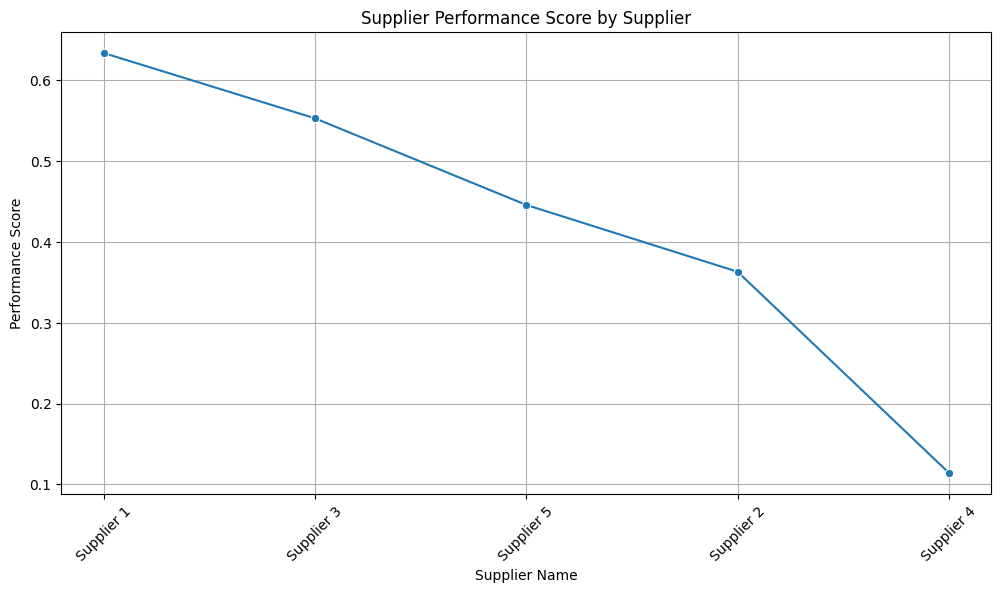

<Figure size 1400x800 with 0 Axes>

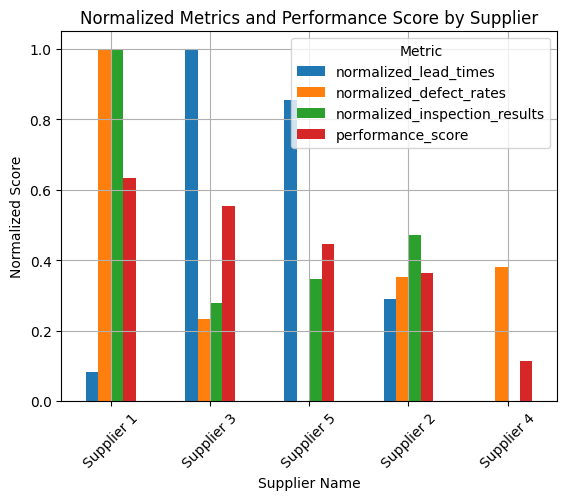

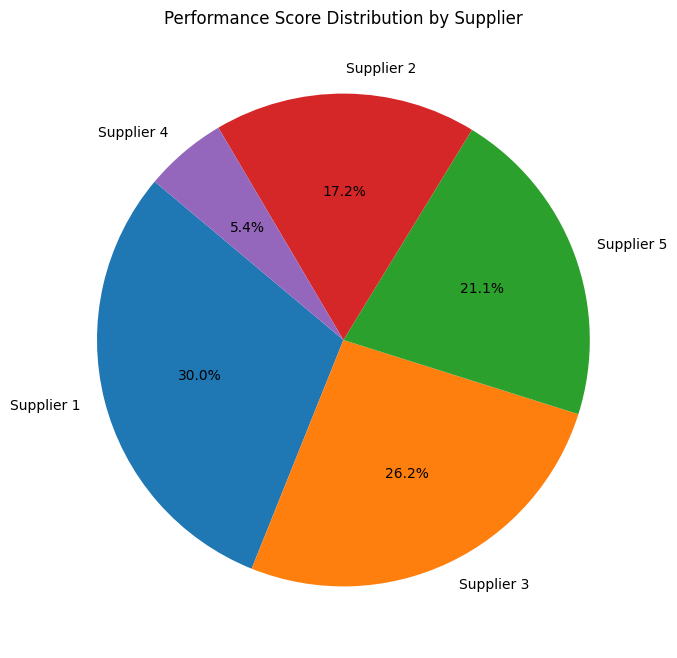

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# Load the dataset
df = pd.read_csv('/supply_chain_data.csv')

# Convert `inspection_results` to numeric values
inspection_mapping = {'Pass': 1, 'Fail': 0, 'Pending': 0}
df['Inspection results'] = df['Inspection results'].map(inspection_mapping)

# Ensure `defect_rates` and `lead_times` are numeric (handle if necessary)
df['Defect rates'] = pd.to_numeric(df['Defect rates'], errors='coerce')
df['Lead times'] = pd.to_numeric(df['Lead times'], errors='coerce')

# Drop rows with NaN values in critical columns (optional based on your data quality needs)
df.dropna(subset=['Defect rates', 'Lead times', 'Inspection results'], inplace=True)

# Aggregate metrics for each supplier
supplier_metrics = df.groupby('Supplier name').agg({
    'Lead times': 'mean',
    'Defect rates': 'mean',
    'Inspection results': 'mean'
}).reset_index()

# Normalize the metrics using Min-Max Scaling
scaler = MinMaxScaler()

# Normalize lead times (lower is better, so we subtract from 1)
supplier_metrics['normalized_lead_times'] = 1 - scaler.fit_transform(supplier_metrics[['Lead times']])

# Normalize defect rates (lower is better, so we subtract from 1)
supplier_metrics['normalized_defect_rates'] = 1 - scaler.fit_transform(supplier_metrics[['Defect rates']])

# Normalize inspection results (higher is better)
supplier_metrics['normalized_inspection_results'] = scaler.fit_transform(supplier_metrics[['Inspection results']])

# Calculate the composite score as a weighted sum of the normalized metrics
supplier_metrics['performance_score'] = (
    0.4 * supplier_metrics['normalized_lead_times'] +
    0.3 * supplier_metrics['normalized_defect_rates'] +
    0.3 * supplier_metrics['normalized_inspection_results']
)

# Sort suppliers by performance score
supplier_metrics = supplier_metrics.sort_values(by='performance_score', ascending=False)

# Display the supplier performance analysis
print(supplier_metrics[['Supplier name', 'Lead times', 'Defect rates', 'Inspection results', 'performance_score']])

# Visualization

# Line plot of performance score over suppliers
plt.figure(figsize=(12, 6))
sns.lineplot(x='Supplier name', y='performance_score', data=supplier_metrics, marker='o')
plt.title('Supplier Performance Score by Supplier')
plt.xlabel('Supplier Name')
plt.ylabel('Performance Score')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Bar plot of normalized metrics and performance score
plt.figure(figsize=(14, 8))
supplier_metrics.set_index('Supplier name')[['normalized_lead_times', 'normalized_defect_rates', 'normalized_inspection_results', 'performance_score']].plot(kind='bar')
plt.title('Normalized Metrics and Performance Score by Supplier')
plt.xlabel('Supplier Name')
plt.ylabel('Normalized Score')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='Metric')
plt.show()

# Pie chart of the distribution of performance scores
plt.figure(figsize=(10, 8))
plt.pie(supplier_metrics['performance_score'], labels=supplier_metrics['Supplier name'], autopct='%1.1f%%', startangle=140)
plt.title('Performance Score Distribution by Supplier')
plt.show()


**Insights:**

**Reliable Suppliers:** Suppliers with higher performance scores demonstrate consistent lead times, low defect rates, and strong inspection results, indicating reliability.

**Improvement Areas:** Suppliers with lower scores may need attention to improve lead times, reduce defects, or enhance product quality as indicated by inspection results.

**Top-Performing Suppliers:** The suppliers with the highest performance scores are those that consistently deliver with shorter lead times, lower defect rates, and higher inspection scores.

**Suppliers Needing Improvement:** Suppliers with lower scores may have issues with lead times, defect rates, or inspection results, which can be addressed through targeted improvement initiatives or by considering alternative suppliers.

**Strategic Procurement:** By identifying the strengths and weaknesses of each supplier, you can make informed decisions in your procurement strategy, such as consolidating orders with reliable suppliers or working with others to improve their performance.

**Lead Time Reduction**

**Problem:** Reduce lead times to improve supply chain responsiveness.

**Solution:** Analyze current lead times and identify bottlenecks using data visualization and process mining techniques.

**Insights:** Shorten lead times by addressing inefficiencies, leading to faster order fulfillment and improved customer experience.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('/supply_chain_data.csv')

# Check for missing values and handle them
df['Lead times'].fillna(df['Lead times'].median(), inplace=True)


In [ ]:
# Group by supplier and product type to calculate average lead times
lead_time_analysis = df.groupby(['Supplier name', 'Product type']).agg({
    'Lead times': 'mean',
    'Number of products sold': 'sum',
    'Manufacturing lead time': 'mean',
    'Shipping times': 'mean'
}).reset_index()

# Sort to identify suppliers or product types with the longest lead times
lead_time_analysis.sort_values(by='Lead times', ascending=False, inplace=True)


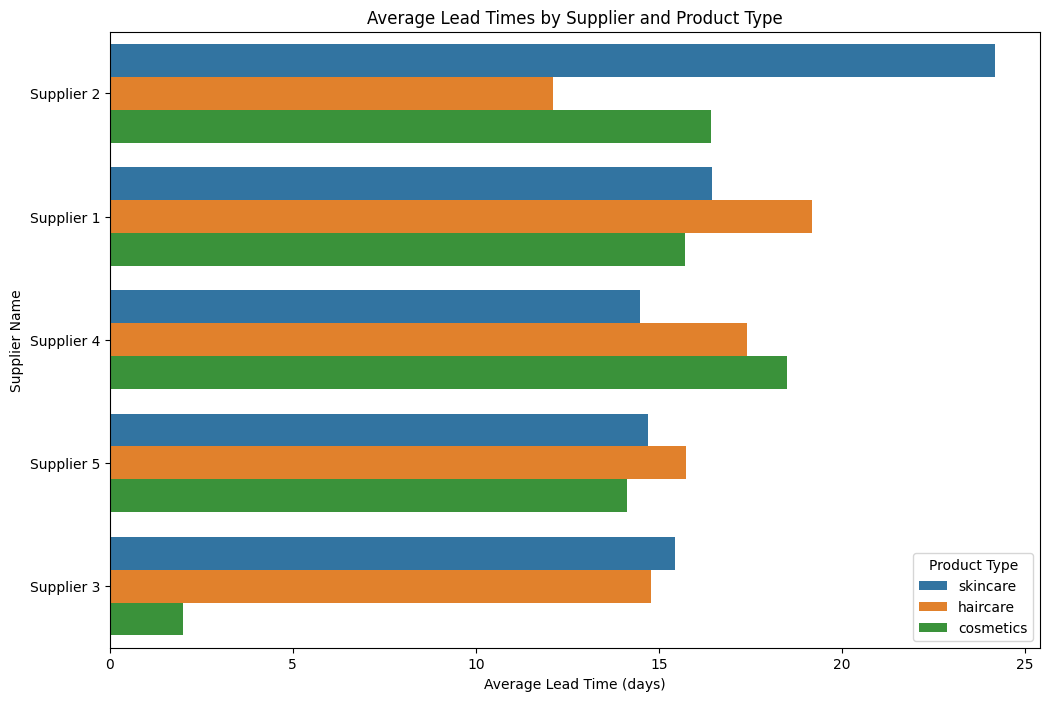

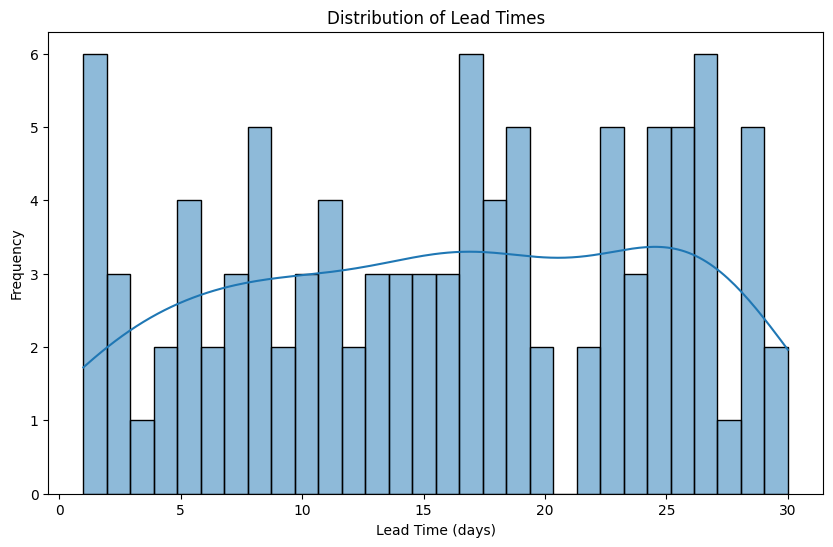

In [ ]:
# Plot lead times by supplier and product type
plt.figure(figsize=(12, 8))
sns.barplot(x='Lead times', y='Supplier name', hue='Product type', data=lead_time_analysis)
plt.title('Average Lead Times by Supplier and Product Type')
plt.xlabel('Average Lead Time (days)')
plt.ylabel('Supplier Name')
plt.legend(title='Product Type')
plt.show()

# Distribution of lead times
plt.figure(figsize=(10, 6))
sns.histplot(df['Lead times'], bins=30, kde=True)
plt.title('Distribution of Lead Times')
plt.xlabel('Lead Time (days)')
plt.ylabel('Frequency')
plt.show()


**Insights and Recommendations**

**High Variance in Lead Times:**
Suppliers or products with high variance in lead times may indicate unreliable delivery schedules. Focus on stabilizing these lead times through better supplier management or alternative sourcing strategies.

**Long Lead Times:**
Suppliers or products with consistently long lead times should be targeted for process improvements, such as optimizing production schedules or negotiating better terms with suppliers.

**Visualization of Bottlenecks:**
Visualizations like bar plots and histograms help quickly identify the worst-performing suppliers or products, enabling more focused interventions.

**Process Improvements:**
Once bottlenecks are identified, work with suppliers to understand the root causes, such as delays in production or shipping, and implement process changes to reduce these lead times.

**Defect Rate Analysis**

**Problem:** Identify factors contributing to high defect rates in products.

**Solution:** Use statistical analysis (e.g., regression) to correlate defect rates with manufacturing processes, suppliers, and inspection results.

**Insights:** Reduce defect rates by improving production processes and selecting better suppliers, leading to higher product quality.

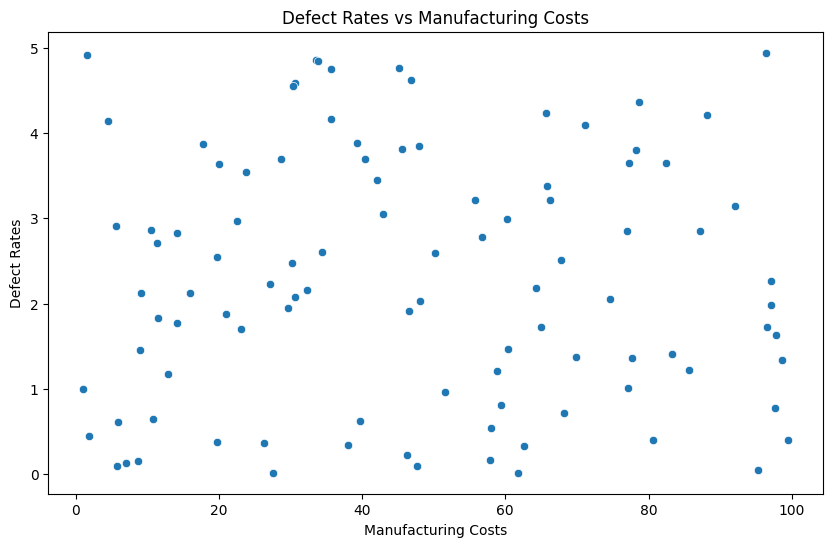

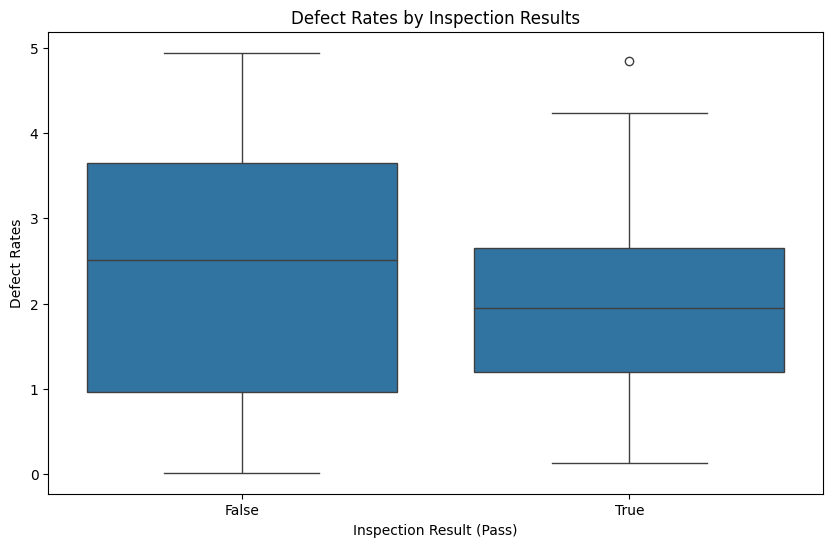

In [ ]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('/supply_chain_data.csv')

# Handle missing values in defect rates and other relevant columns
df['Defect rates'].fillna(df['Defect rates'].median(), inplace=True)
df['Manufacturing costs'].fillna(df['Manufacturing costs'].median(), inplace=True)
df['Inspection results'].fillna('Pending', inplace=True)

# Convert categorical columns to numerical if needed
df = pd.get_dummies(df, columns=['Supplier name', 'Inspection results', 'Transportation modes', 'Routes'], drop_first=True)
# Scatter plot to visualize the relationship between defect rates and manufacturing costs
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Manufacturing costs', y='Defect rates', data=df)
plt.title('Defect Rates vs Manufacturing Costs')
plt.xlabel('Manufacturing Costs')
plt.ylabel('Defect Rates')
plt.show()

# Box plot to visualize defect rates by inspection results
plt.figure(figsize=(10, 6))
sns.boxplot(x='Inspection results_Pass', y='Defect rates', data=df)
plt.title('Defect Rates by Inspection Results')
plt.xlabel('Inspection Result (Pass)')
plt.ylabel('Defect Rates')
plt.show()



**Actionable Insights**

**Supplier Impact:**

If certain suppliers have a significant positive correlation with defect rates, they might be contributing to quality issues. Consider renegotiating contracts or finding alternative suppliers.

**Manufacturing Costs:**

If higher manufacturing costs are associated with lower defect rates, it might indicate that investing in better materials or processes pays off in terms of product quality.

**Inspection Process:**

If inspection results are strongly correlated with defect rates, improving the inspection process could help catch defects earlier, reducing the number of defective products reaching customers.

**Process Improvements:**

Identifying the processes or steps in the supply chain that are contributing to higher defect rates can lead to targeted improvements, reducing overall defect rates.

**Revenue and Profitability Analysis**

**Problem:** Identify the most profitable products and regions.

**Solution: ** Perform a profitability analysis using revenue and cost data, segmented by product and region.

**Insights:** Focus on high-margin products and regions, optimize pricing strategies, and improve profitability.

In [ ]:
import pandas as pd
df = pd.read_csv('/supply_chain_data.csv')


# Assuming the DataFrame is already loaded as 'df'

# Calculate total cost (assuming relevant costs are manufacturing and shipping costs)
df['total_cost'] = df['Manufacturing costs'] + df['Shipping costs']

# Calculate profit
df['profit'] = df['Revenue generated'] - df['total_cost']
# Group by product and region
profitability = df.groupby(['SKU', 'Location']).agg({
    'Revenue generated': 'sum',
    'total_cost': 'sum',
    'profit': 'sum'
}).reset_index()

# Calculate profit margin
profitability['profit_margin'] = (profitability['profit'] / profitability['Revenue generated']) * 100
# Sort by profit to identify the most profitable products and regions
most_profitable = profitability.sort_values(by='profit', ascending=False)

# Display the top 10 most profitable products and regions
print(most_profitable.head(10))


      SKU   Location  Revenue generated  total_cost       profit  \
47  SKU51  Bangalore        9866.465458   18.973329  9847.492129   
32  SKU38     Mumbai        9692.318040   15.166625  9677.151415   
25  SKU31    Chennai        9655.135103   62.930807  9592.204296   
12   SKU2     Mumbai        9577.749626   38.742499  9539.007127   
26  SKU32    Kolkata        9571.550487   36.291572  9535.258915   
90  SKU90  Bangalore        9592.633570   93.350394  9499.283176   
64  SKU67     Mumbai        9473.798033   16.205688  9457.592345   
48  SKU52     Mumbai        9435.762609   17.797901  9417.964708   
87  SKU88     Mumbai        9444.742033   71.986172  9372.755861   
10  SKU18    Kolkata        9364.673505   31.447206  9333.226300   

    profit_margin  
47      99.807699  
32      99.843519  
25      99.348214  
12      99.595495  
26      99.620839  
90      99.026853  
64      99.828942  
48      99.811378  
87      99.237817  
10      99.664193  


In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/supply_chain_data.csv')

# Calculate total cost (assuming relevant costs are manufacturing and shipping costs)
df['total_cost'] = df['Manufacturing costs'] + df['Shipping costs']

# Calculate profit
df['profit'] = df['Revenue generated'] - df['total_cost']

# Group by SKU and Location
profitability = df.groupby(['SKU', 'Location']).agg({
    'Revenue generated': 'sum',
    'total_cost': 'sum',
    'profit': 'sum'
}).reset_index()

# Calculate profit margin
profitability['profit_margin'] = (profitability['profit'] / profitability['Revenue generated']) * 100

# Sort by profit
most_profitable = profitability.sort_values(by='profit', ascending=False)

# Display the top 10 most profitable products and regions
print(most_profitable.head(10))



      SKU   Location  Revenue generated  total_cost       profit  \
47  SKU51  Bangalore        9866.465458   18.973329  9847.492129   
32  SKU38     Mumbai        9692.318040   15.166625  9677.151415   
25  SKU31    Chennai        9655.135103   62.930807  9592.204296   
12   SKU2     Mumbai        9577.749626   38.742499  9539.007127   
26  SKU32    Kolkata        9571.550487   36.291572  9535.258915   
90  SKU90  Bangalore        9592.633570   93.350394  9499.283176   
64  SKU67     Mumbai        9473.798033   16.205688  9457.592345   
48  SKU52     Mumbai        9435.762609   17.797901  9417.964708   
87  SKU88     Mumbai        9444.742033   71.986172  9372.755861   
10  SKU18    Kolkata        9364.673505   31.447206  9333.226300   

    profit_margin  
47      99.807699  
32      99.843519  
25      99.348214  
12      99.595495  
26      99.620839  
90      99.026853  
64      99.828942  
48      99.811378  
87      99.237817  
10      99.664193  


<ipython-input-45-fbe9c78afe8e>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='profit', y='SKU', hue='Location', data=most_profitable.head(10), ci=None)


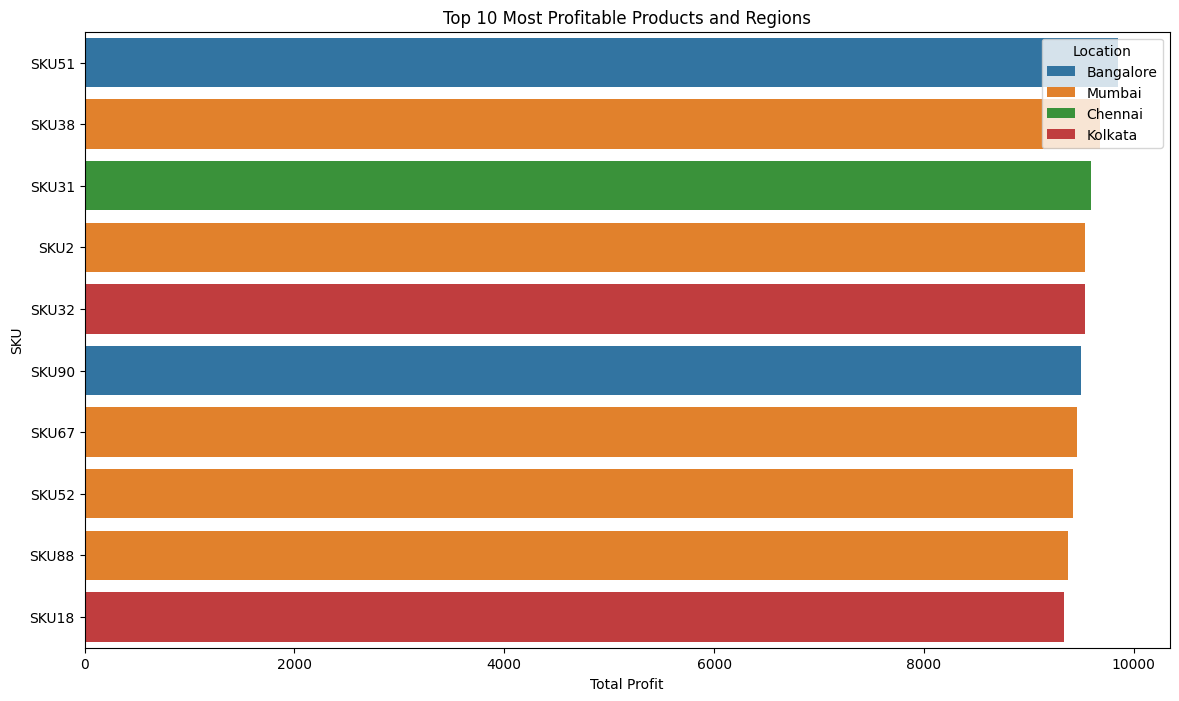

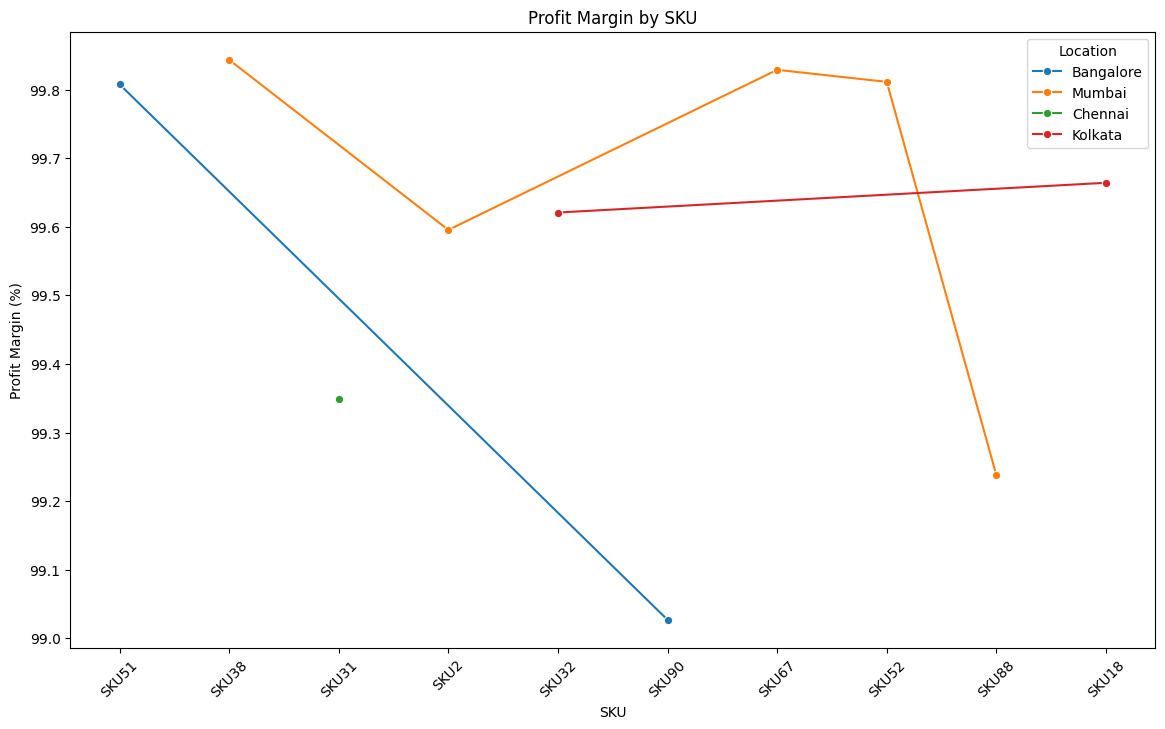

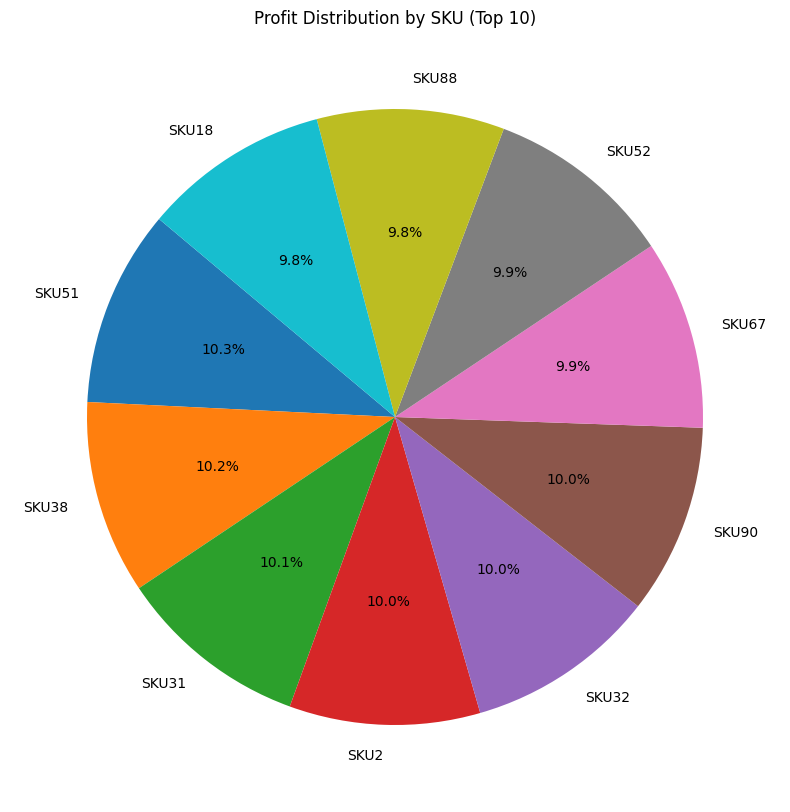

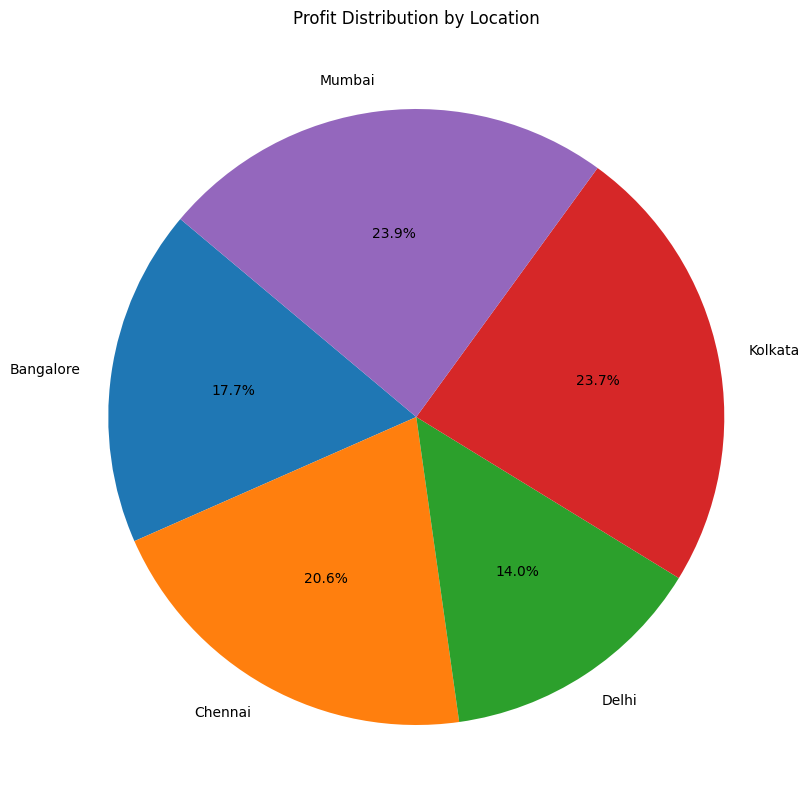

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar Chart: Profit by SKU and Location
plt.figure(figsize=(14, 8))
sns.barplot(x='profit', y='SKU', hue='Location', data=most_profitable.head(10), ci=None)
plt.title('Top 10 Most Profitable Products and Regions')
plt.xlabel('Total Profit')
plt.ylabel('SKU')
plt.legend(title='Location')
plt.show()

# Line Chart: Profit Margin by SKU
plt.figure(figsize=(14, 8))
sns.lineplot(x='SKU', y='profit_margin', hue='Location', data=most_profitable.head(10), marker='o')
plt.title('Profit Margin by SKU')
plt.xlabel('SKU')
plt.ylabel('Profit Margin (%)')
plt.xticks(rotation=45)
plt.legend(title='Location')
plt.show()

# Pie Chart: Profit Distribution by SKU
top_skus = most_profitable.head(10)
plt.figure(figsize=(10, 10))
plt.pie(top_skus['profit'], labels=top_skus['SKU'], autopct='%1.1f%%', startangle=140)
plt.title('Profit Distribution by SKU (Top 10)')
plt.show()

# Pie Chart: Profit Distribution by Location
profit_by_location = most_profitable.groupby('Location')['profit'].sum().reset_index()
plt.figure(figsize=(10, 10))
plt.pie(profit_by_location['profit'], labels=profit_by_location['Location'], autopct='%1.1f%%', startangle=140)
plt.title('Profit Distribution by Location')
plt.show()


**Generate Insights**
Based on the analysis, you can generate insights like:

**High-Margin Products:** Focus on products with high profit margins for better profitability.

**Top Regions:** Invest more in regions that contribute the most to profitability.

**Optimization Opportunities:** Explore regions or products with low profitability to identify potential improvements in pricing or cost reduction.

**Order Fulfillment Optimization**

**Problem:** Optimize order fulfillment to reduce delivery times and costs.

**Solution:** Analyze order processing times, shipping times, and transportation routes to identify inefficiencies.

**Insights:** Streamline the order fulfillment process, reduce delays, and enhance customer satisfaction.

  Product type  Order quantities  Shipping time  Shipping costs  \
0    cosmetics               150            6.0            60.0   
1     haircare               100            5.0            50.0   
2     skincare               200            7.0            70.0   

  Transportation modes   Routes  
0                 Land  Route C  
1                  Air  Route A  
2                  Sea  Route B  
  Product type   Routes  Order quantities  Shipping time  Shipping costs
0    cosmetics  Route C               150            6.0            60.0
1     haircare  Route A               100            5.0            50.0
2     skincare  Route B               200            7.0            70.0


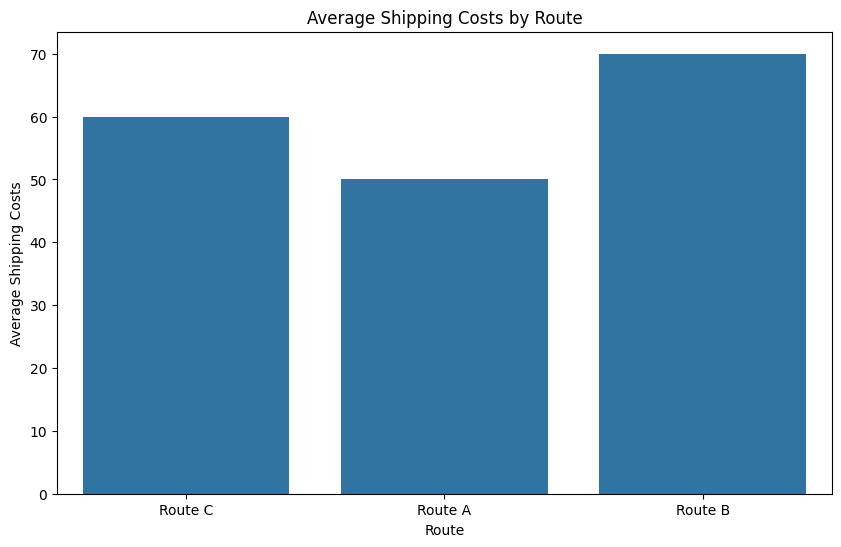

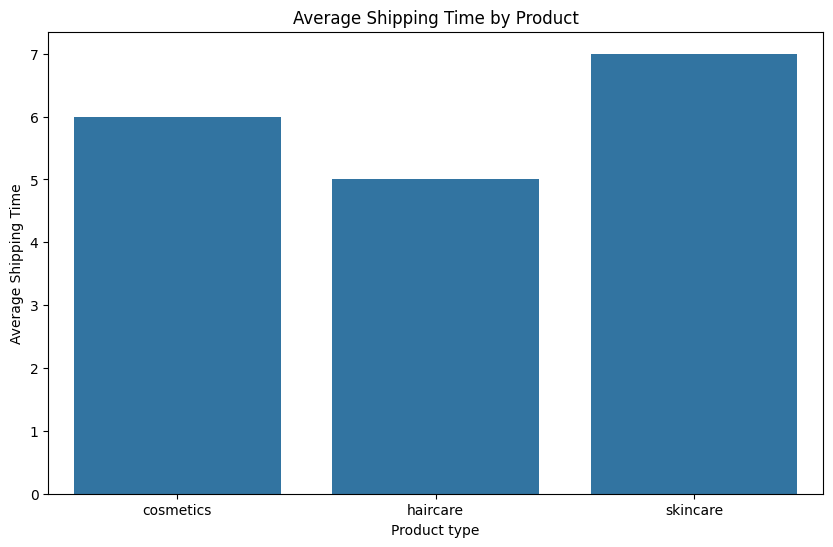

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/supply_chain_data.csv')

# Example DataFrame (Replace this with your actual DataFrame)
data = {
    'Product type': ['haircare', 'skincare', 'cosmetics'],
    'Order quantities': [100, 200, 150],
    'Shipping time': [5, 7, 6,],  # in days
    'Shipping costs': [50, 70, 60],  # in dollars
    'Transportation modes': ['Air', 'Sea', 'Land'],
    'Routes': ['Route A', 'Route B', 'Route C']
}

df = pd.DataFrame(data)

# Aggregate data by Product type
aggregated_data = df.groupby('Product type').agg({
    'Order quantities': 'sum',  # Summing order quantities
    'Shipping time': 'mean',    # Averaging shipping time
    'Shipping costs': 'mean',   # Averaging shipping costs
    'Transportation modes': lambda x: ', '.join(x),  # Concatenating transportation modes
    'Routes': lambda x: ', '.join(x)  # Concatenating routes
}).reset_index()

# Display the aggregated data
print(aggregated_data)

# Calculate total order processing time (assuming processing time is part of shipping time)
# In this example, processing time is not provided, so this is a simple representation
df['Total order time'] = df['Shipping time']  # Add processing time if available

# Group by product and route to analyze performance
performance = df.groupby(['Product type', 'Routes']).agg({
    'Order quantities': 'sum',
    'Shipping time': 'mean',
    'Shipping costs': 'mean'
}).reset_index()

# Print performance summary
print(performance)

# Insights:
# 1. Identify products with high shipping times and costs.
# 2. Compare routes to find the most efficient ones.
# 3. Optimize the transportation mode based on cost and time.

# Visualizing the data (optional)
import matplotlib.pyplot as plt
import seaborn as sns

# Plot average shipping costs by route
plt.figure(figsize=(10, 6))
sns.barplot(x='Routes', y='Shipping costs', data=performance)
plt.title('Average Shipping Costs by Route')
plt.xlabel('Route')
plt.ylabel('Average Shipping Costs')
plt.show()

# Plot average shipping time by product
plt.figure(figsize=(10, 6))
sns.barplot(x='Product type', y='Shipping time', data=performance)
plt.title('Average Shipping Time by Product')
plt.xlabel('Product type')
plt.ylabel('Average Shipping Time')
plt.show()


**Insights and Actions**

**High Shipping Times and Costs: **Identify products or routes with high shipping times and costs to find optimization opportunities.

**Route Optimization:** Determine which routes are the most cost-effective and quickest.

**Transportation Modes:** Assess whether switching transportation modes could reduce costs or delivery times.

**Transportation Mode Selection**

**Problem:** Choose the most efficient transportation modes based on cost, speed, and reliability.

**Solution:** Use decision trees or other classification models to recommend the best transportation mode for each route and order.

**Insights:** Balance cost and speed in transportation, improve delivery performance, and reduce logistics costs.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder

# Load the dataset
df = pd.read_csv('/supply_chain_data.csv')  # Replace with your actual data file

# Feature Engineering
# Create a new column for cost-effectiveness (Shipping cost per order quantity)
df['cost_effectiveness'] = df['Shipping costs'] / df['Order quantities']

# Encode categorical variables
label_encoder = LabelEncoder()
df['transportation_modes_encoded'] = label_encoder.fit_transform(df['Transportation modes'])
df['routes_encoded'] = label_encoder.fit_transform(df['Routes'])

# Create a mapping of encoded labels to transportation modes
label_mapping = dict(zip(label_encoder.transform(label_encoder.classes_), label_encoder.classes_))

# Select relevant features and target
X = df[['cost_effectiveness', 'Shipping times', 'routes_encoded']]  # Features
y = df['transportation_modes_encoded']  # Target (transportation mode)

# Ensure that all classes are represented in both training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Train a Decision Tree Classifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))

# Handle unseen labels: map classes that exist in the model but not in the label mapping
# If a class is not present in the label mapping, return "Unknown"
target_names = [label_mapping.get(i, "Unknown") for i in sorted(model.classes_)]

# Get the classification report using the target names
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=target_names))

# Insights and Recommendations
df['predicted_transportation_modes'] = model.predict(X)
df['predicted_transportation_modes'] = df['predicted_transportation_modes'].map(label_mapping).fillna("Unknown")
recommendations = df[['Routes', 'Order quantities', 'Shipping times', 'Shipping costs', 'predicted_transportation_modes']]
print("Transportation Mode Recommendations:\n", recommendations.head())







Accuracy: 0.26666666666666666
Classification Report:
               precision    recall  f1-score   support

     Route A       0.15      0.25      0.19         8
     Route B       0.25      0.12      0.17         8
     Route C       0.40      0.44      0.42         9
     Unknown       0.33      0.20      0.25         5

    accuracy                           0.27        30
   macro avg       0.28      0.25      0.26        30
weighted avg       0.28      0.27      0.26        30

Transportation Mode Recommendations:
     Routes  Order quantities  Shipping times  Shipping costs  \
0  Route B                96               4        2.956572   
1  Route B                37               2        9.716575   
2  Route C                88               2        8.054479   
3  Route A                59               6        1.729569   
4  Route A                56               8        3.890548   

  predicted_transportation_modes  
0                        Route C  
1                 

Accuracy: 0.26666666666666666
Classification Report:
 {'Route A': {'precision': 0.15384615384615385, 'recall': 0.25, 'f1-score': 0.1904761904761905, 'support': 8.0}, 'Route B': {'precision': 0.25, 'recall': 0.125, 'f1-score': 0.16666666666666666, 'support': 8.0}, 'Route C': {'precision': 0.4, 'recall': 0.4444444444444444, 'f1-score': 0.4210526315789474, 'support': 9.0}, 'Unknown': {'precision': 0.3333333333333333, 'recall': 0.2, 'f1-score': 0.25, 'support': 5.0}, 'accuracy': 0.26666666666666666, 'macro avg': {'precision': 0.2842948717948718, 'recall': 0.2548611111111111, 'f1-score': 0.25704887218045114, 'support': 30.0}, 'weighted avg': {'precision': 0.2832478632478633, 'recall': 0.26666666666666666, 'f1-score': 0.26322055137844613, 'support': 30.0}}


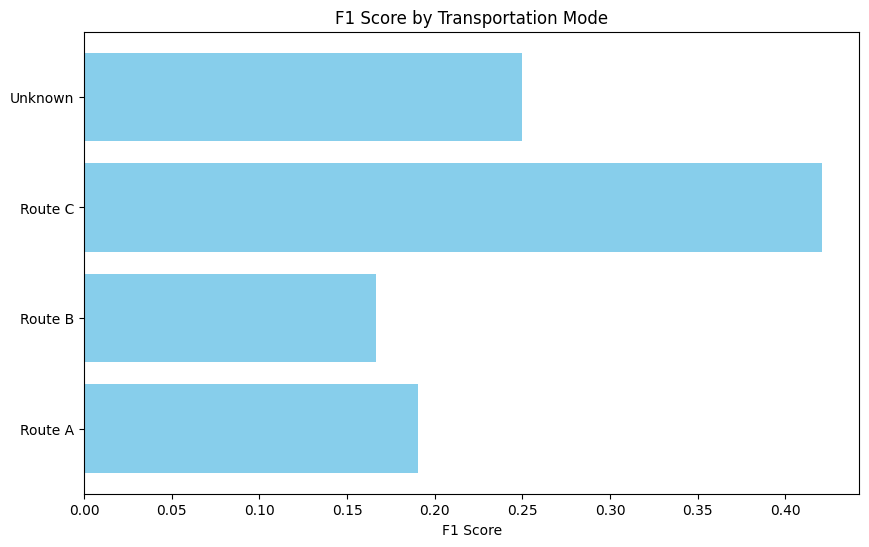

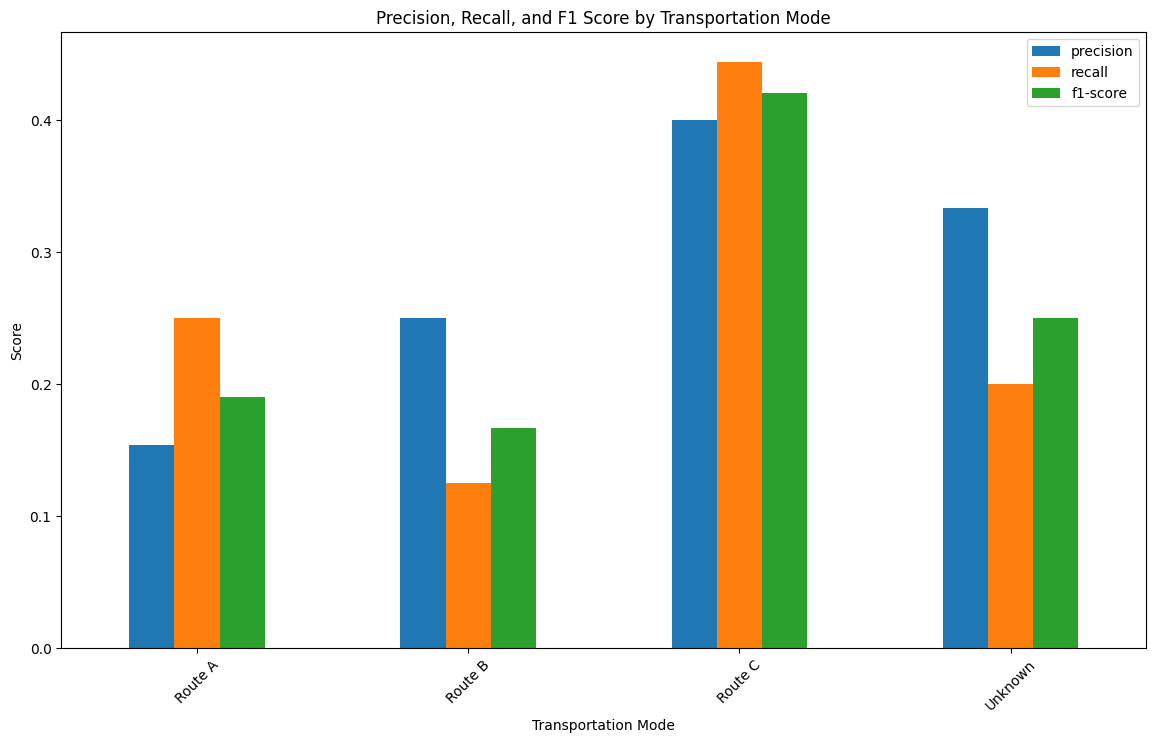

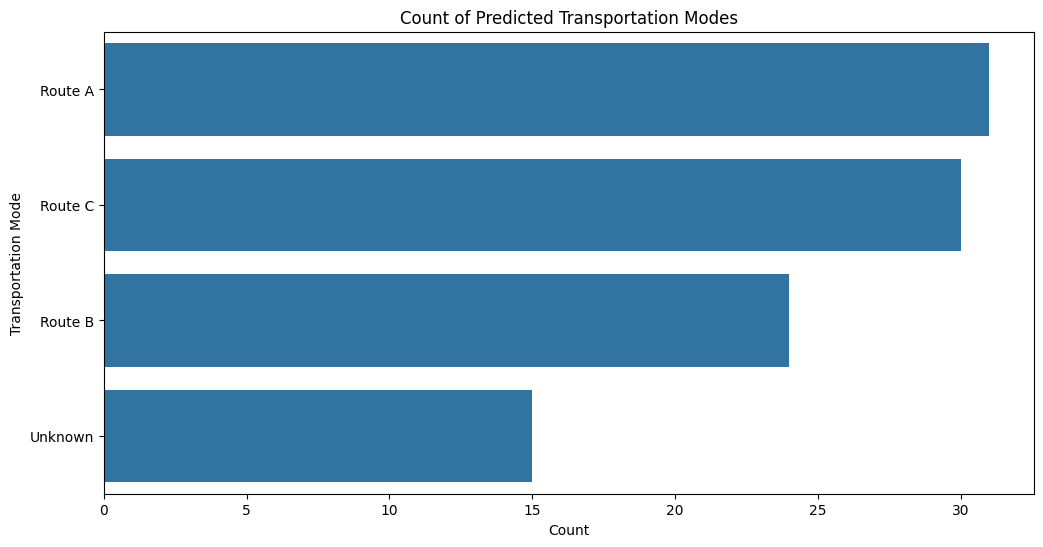

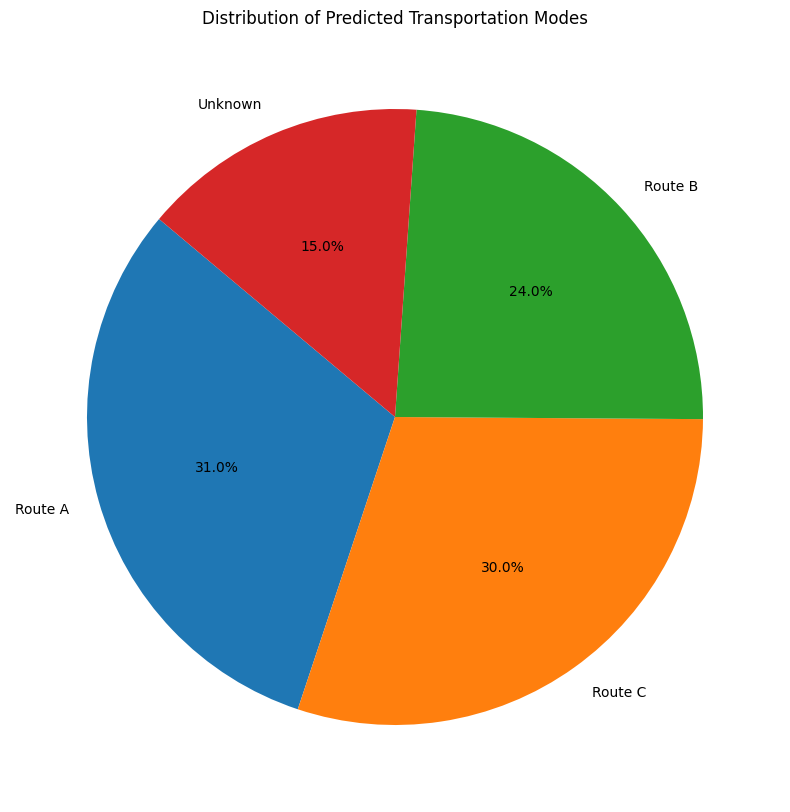

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder

# Load the dataset
df = pd.read_csv('/supply_chain_data.csv')  # Replace with your actual data file

# Feature Engineering
df['cost_effectiveness'] = df['Shipping costs'] / df['Order quantities']

# Encode categorical variables
label_encoder = LabelEncoder()
df['transportation_modes_encoded'] = label_encoder.fit_transform(df['Transportation modes'])
df['routes_encoded'] = label_encoder.fit_transform(df['Routes'])

# Create a mapping of encoded labels to transportation modes
label_mapping = dict(zip(label_encoder.transform(label_encoder.classes_), label_encoder.classes_))

# Select relevant features and target
X = df[['cost_effectiveness', 'Shipping times', 'routes_encoded']]  # Features
y = df['transportation_modes_encoded']  # Target (transportation mode)

# Ensure that all classes are represented in both training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Train a Decision Tree Classifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Handle unseen labels: map classes that exist in the model but not in the label mapping
target_names = [label_mapping.get(i, "Unknown") for i in sorted(model.classes_)]

# Get the classification report using the target names
report = classification_report(y_test, y_pred, target_names=target_names, output_dict=True)
print("Classification Report:\n", report)

# Create DataFrame from classification report for visualization
report_df = pd.DataFrame(report).transpose()

# Plot Accuracy
plt.figure(figsize=(10, 6))
plt.barh(report_df.index[:-3], report_df['f1-score'][:-3], color='skyblue')
plt.xlabel('F1 Score')
plt.title('F1 Score by Transportation Mode')
plt.show()

# Plot Precision, Recall, and F1 Score
fig, ax = plt.subplots(figsize=(14, 8))
report_df[['precision', 'recall', 'f1-score']].iloc[:-3].plot(kind='bar', ax=ax)
plt.title('Precision, Recall, and F1 Score by Transportation Mode')
plt.ylabel('Score')
plt.xlabel('Transportation Mode')
plt.legend(loc='best')
plt.xticks(rotation=45)
plt.show()

# Visualize predictions
df['predicted_transportation_modes'] = model.predict(X)
df['predicted_transportation_modes'] = df['predicted_transportation_modes'].map(label_mapping).fillna("Unknown")

# Bar Chart of Predicted Transportation Modes
plt.figure(figsize=(12, 6))
sns.countplot(y='predicted_transportation_modes', data=df, order=df['predicted_transportation_modes'].value_counts().index)
plt.title('Count of Predicted Transportation Modes')
plt.xlabel('Count')
plt.ylabel('Transportation Mode')
plt.show()

# Pie Chart of Predicted Transportation Modes Distribution
mode_counts = df['predicted_transportation_modes'].value_counts()
plt.figure(figsize=(10, 10))
plt.pie(mode_counts, labels=mode_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Predicted Transportation Modes')
plt.show()


**Insights:**

**Balancing Cost and Speed:** The model can help balance the trade-off between shipping costs and delivery speed by recommending the most efficient transportation mode for each situation.

**Improved Logistics:** The decision tree model can assist in reducing logistics costs and improving delivery performance by selecting the optimal transportation mode for different routes and order sizes.

In [ ]:
import pandas as pd

# Load the dataset (replace the path with the actual file path)
df = pd.read_csv('/supply_chain_data.csv')

# Display the data types of all columns
print(df.dtypes)


Product type                object
SKU                         object
Price                      float64
Availability                 int64
Number of products sold      int64
Revenue generated          float64
Customer demographics       object
Stock levels                 int64
Lead times                   int64
Order quantities             int64
Shipping times               int64
Shipping carriers           object
Shipping costs             float64
Supplier name               object
Location                    object
Lead time                    int64
Production volumes           int64
Manufacturing lead time      int64
Manufacturing costs        float64
Inspection results          object
Defect rates               float64
Transportation modes        object
Routes                      object
Costs                      float64
dtype: object


In [ ]:
import pandas as pd
# Load the dataset
df = pd.read_csv('/content/supply_chain_data.csv')  # Replace with your actual data file

# Example DataFrame structure:
# df = pd.DataFrame({
#     'Product key': [...],
#     'SKU': [...],
#     'Order quantities': [...],
#     'Shipping times': [...],
#     'Shipping costs': [...],
#     'Transportation modes': [...],
#     'Routes': [...],
#     'Defect rates': [...],
#     'Delivery delays': [...]  # Delivery delays or other reliability measures
# })

# Step 1: Calculate average metrics for each transportation mode
mode_metrics = df.groupby('Transportation modes').agg({
    'Shipping costs': 'mean',
    'Shipping times': 'mean',
    'Defect rates': 'mean',
}).reset_index()

# Step 2: Normalize the metrics for comparison
mode_metrics['cost_score'] = mode_metrics['Shipping costs'] / mode_metrics['Shipping costs'].max()
mode_metrics['time_score'] = mode_metrics['Shipping times'] / mode_metrics['Shipping times'].max()
mode_metrics['reliability_score'] = 1 - (mode_metrics[['Defect rates']].mean(axis=1) / mode_metrics[['Defect rates']].max().max())

# Step 3: Calculate a weighted score (weights can be adjusted based on business needs)
mode_metrics['overall_score'] = 0.5 * mode_metrics['cost_score'] + 0.3 * mode_metrics['time_score'] + 0.2 * mode_metrics['reliability_score']

# Step 4: Rank transportation modes
mode_metrics = mode_metrics.sort_values(by='overall_score', ascending=True)

# Display the result
print("Ranked Transportation Modes Based on Cost, Speed, and Reliability:")
print(mode_metrics[['Transportation modes', 'overall_score']])

Ranked Transportation Modes Based on Cost, Speed, and Reliability:
  Transportation modes  overall_score
2                 Road       0.659590
3                  Sea       0.736288
1                 Rail       0.754439
0                  Air       0.776426


<ipython-input-5-4690b3a0ddd5>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='overall_score', y='Transportation modes', data=mode_metrics, palette='viridis')
<ipython-input-5-4690b3a0ddd5>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='cost_score', y='Transportation modes', data=mode_metrics, palette='plasma')
<ipython-input-5-4690b3a0ddd5>:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='time_score', y='Transportation modes', data=mode_metrics, palette='coolwarm')
<ipython-input-5-4690b3a0ddd5>:51: FutureWarning: 

Passing `

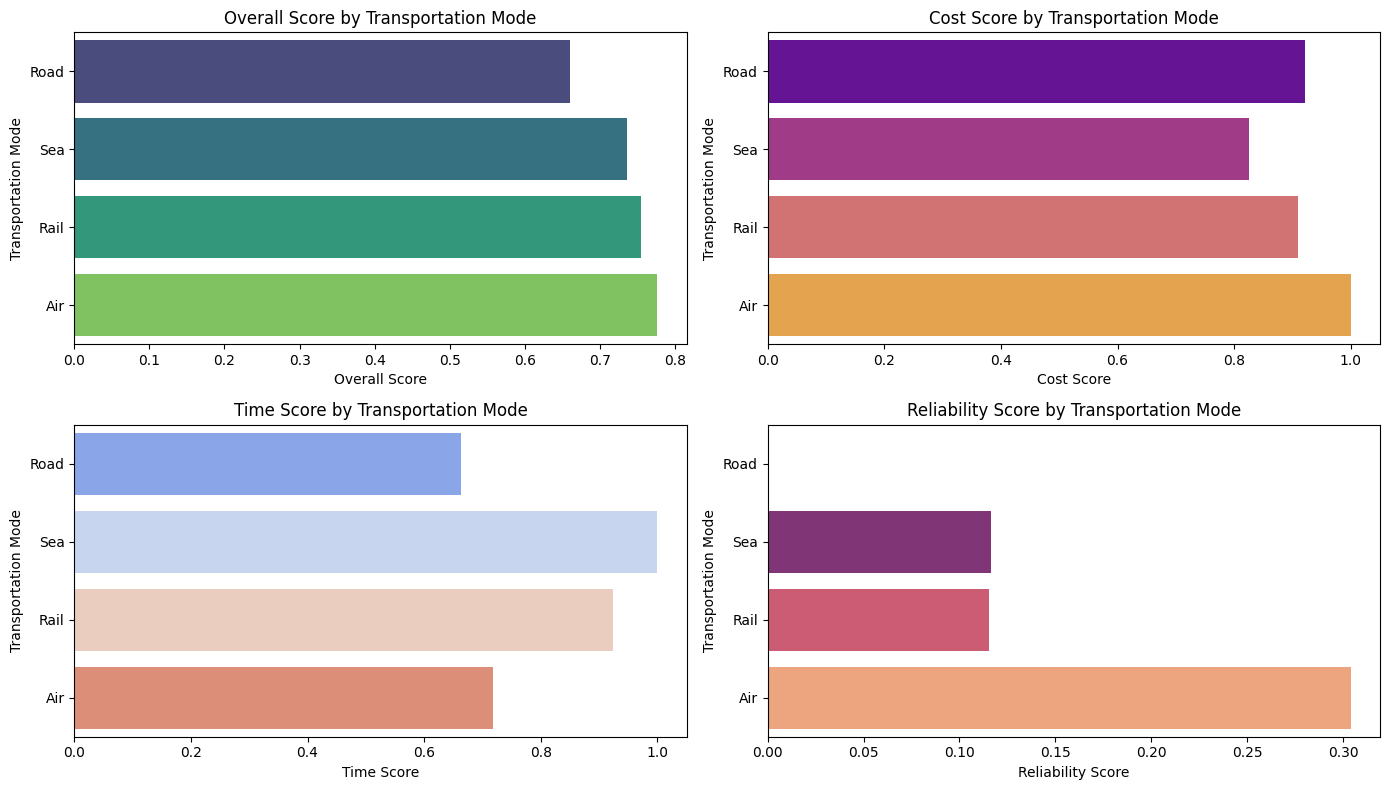

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/supply_chain_data.csv')  # Replace with your actual data file

# Step 1: Calculate average metrics for each transportation mode
mode_metrics = df.groupby('Transportation modes').agg({
    'Shipping costs': 'mean',
    'Shipping times': 'mean',
    'Defect rates': 'mean',
}).reset_index()

# Step 2: Normalize the metrics for comparison
mode_metrics['cost_score'] = mode_metrics['Shipping costs'] / mode_metrics['Shipping costs'].max()
mode_metrics['time_score'] = mode_metrics['Shipping times'] / mode_metrics['Shipping times'].max()
mode_metrics['reliability_score'] = 1 - (mode_metrics[['Defect rates']].mean(axis=1) / mode_metrics[['Defect rates']].max().max())

# Step 3: Calculate a weighted score (weights can be adjusted based on business needs)
mode_metrics['overall_score'] = 0.5 * mode_metrics['cost_score'] + 0.3 * mode_metrics['time_score'] + 0.2 * mode_metrics['reliability_score']

# Step 4: Rank transportation modes
mode_metrics = mode_metrics.sort_values(by='overall_score', ascending=True)

# Step 5: Visualization
plt.figure(figsize=(14, 8))

# Barplot for overall score
plt.subplot(2, 2, 1)
sns.barplot(x='overall_score', y='Transportation modes', data=mode_metrics, palette='viridis')
plt.title('Overall Score by Transportation Mode')
plt.xlabel('Overall Score')
plt.ylabel('Transportation Mode')

# Barplot for cost score
plt.subplot(2, 2, 2)
sns.barplot(x='cost_score', y='Transportation modes', data=mode_metrics, palette='plasma')
plt.title('Cost Score by Transportation Mode')
plt.xlabel('Cost Score')
plt.ylabel('Transportation Mode')

# Barplot for time score
plt.subplot(2, 2, 3)
sns.barplot(x='time_score', y='Transportation modes', data=mode_metrics, palette='coolwarm')
plt.title('Time Score by Transportation Mode')
plt.xlabel('Time Score')
plt.ylabel('Transportation Mode')

# Barplot for reliability score
plt.subplot(2, 2, 4)
sns.barplot(x='reliability_score', y='Transportation modes', data=mode_metrics, palette='magma')
plt.title('Reliability Score by Transportation Mode')
plt.xlabel('Reliability Score')
plt.ylabel('Transportation Mode')

plt.tight_layout()
plt.show()
